<H1>DS 7331 Fall 2023: Lab 3</H1>
<H3>Team Members: Jae Chung, Matthew David, Nick Mueller, Alex Thibeaux</H3>
<br>
<H2>Kaggle Diabetes Dataset</H2>
<H4> Libraries Used: </H4>

In [1]:
# Libraries
import numpy as np
import pandas as pd
import opendatasets as od # Loading in Kaggle Datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from gower import gower_matrix
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [2]:

# Define the file path
file_path = r'C:\Users\matth\Machine Learning\Proj1\preclean.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Randomly sample 15,000 rows when diabetes_binary is "0"
data1_0 = df[df['Diabetes_binary'] == 0].sample(n=15000, random_state=42)

# Randomly sample 15,000 rows when diabetes_binary is "1"
data1_1 = df[df['Diabetes_binary'] == 1].sample(n=15000, random_state=42)

# Concatenate the two sampled DataFrames into data1
data1 = pd.concat([data1_0, data1_1])

# Reset the index of the new DataFrame
data1.reset_index(drop=True, inplace=True)

# Display the first few rows of data1
data1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,5.0,0.0,0.0,4.0,6.0,7.0
1,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,5.0
2,0.0,1.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,6.0,8.0
3,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,3.0,5.0,1.0,1.0,13.0,6.0,1.0
4,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,6.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       30000 non-null  float64
 1   HighBP                30000 non-null  float64
 2   HighChol              30000 non-null  float64
 3   CholCheck             30000 non-null  float64
 4   BMI                   30000 non-null  float64
 5   Smoker                30000 non-null  float64
 6   Stroke                30000 non-null  float64
 7   HeartDiseaseorAttack  30000 non-null  float64
 8   PhysActivity          30000 non-null  float64
 9   Fruits                30000 non-null  float64
 10  Veggies               30000 non-null  float64
 11  HvyAlcoholConsump     30000 non-null  float64
 12  AnyHealthcare         30000 non-null  float64
 13  NoDocbcCost           30000 non-null  float64
 14  GenHlth               30000 non-null  float64
 15  MentHlth           

<H2> Business Understanding </H2>
Diabetes is a prevalent chronic disease affecting nearly 37.3 million Americans, with 38% of individuals over the age of 18 having prediabetes. The Behavior Risk Factor Surveillance System (BRFSS) conducts annual surveys involving approximately 400,000 adults to gain insights into this disease.

In our study, we analyzed a dataset comprising 285,000 complete responses collected during the 2015 survey out of the original 441,455 responses. The initial dataset showed an imbalance, with 84% of cases being nondiabetic. To address this, we performed undersampling, resulting in a balanced dataset of 15,000 cases for both diabetic/prediabetic (yes) and nondiabetic (no) responses. This modified dataset underwent careful undersampling to achieve a balanced 50-50 split. Additionally, we refined the dataset to include only 21 key features prioritized for their significant impact on predicting diabetes(this refinement was done by Kaggle user Alex Teboul).

The primary goal of this dataset is to facilitate predictive modeling of diabetes based on health factors. This aids public health officials in gaining deeper insights into diabetes and promoting early diagnosis, leading to lifestyle changes and more effective treatments. Diabetes not only leads to health complications but also incurs a significant annual economic cost of nearly 727 billion dollars.

In our study, we aim to use a combination of a k-medoids clustering algorithm and the original 21 features to model diabetes. Due to the dataset's nature, we will use one-hot encoding and feature scaling before deploying our clustering algorithm. This ensures data integrity, speeds up computation time, and maintains consistency. The mix of datatypes requires us to use Gower's distance metric for our clustering algorithm.


We will employ two logistic regression models, employing a 10-fold cross-validation for our scoring metrics. The first model will incorporate both the original data and the identified clusters. The second model will be the logistic regression model identified as the best-fitting model from lab 2. This will serve as our baseline model, allowing us to assess whether the additional features derived from clustering make a significant difference. We will be using the following scoring metric to asses the performance of our models.
<H4>Recall</H4>
This metric holds significant importance during our initial model fitting and tuning phases, serving as our primary focus. We have specifically selected this metric due to its critical relevance in healthcare data, where the minimization of false negatives is paramount for ensuring accurate classification of the positive class. In this instance, our objective is to identify as many cases of prediabetes or diabetes as possible. The ultimate aim of our deployment is to establish an early detection algorithm, incorporating follow-up calls to notify survey participants about potential diabetes risk and encourage them to seek medical advice. In this context, the impact of a false positive is not as crucial, given that prediabetes cases often entail lifestyle changes. This differs from our prior study on heart disease, where the emphasis was on minimizing false positives due to the potential for costly follow-up procedures.
<H4>AUC</H4>
We will briefly examine the Area Under the Curve (AUC) to assess the model's ability to discriminate between classes. This metric will also serve as a basis for comparing the two models.
<H4>Precision</H4>
The final metric under consideration is precision. While our primary focus is on recall, as we aim to tune the models to achieve a 90% recall, we will also examine precision to ensure that we haven't sacrificed too much in terms of generalizability. We plan to compare the precision of the initial model to that of the adjusted model, evaluating whether the tradeoff is justified.
<H4>silhouette score </H4>
Using this metric we will be able to see how similar a value is to its own cluster when compared to the other clusters. It evaluates the cohesion within the cluster without making assumptions based on the shape of the cluster.

 <h2> Data Understanding 1 </h2>
 


<H3>Data Meaning Type(Data File)</H3>
<I>The table below describes the meaning and type of data for each attribute in the original data file<I>

<table>
  <tr>
    <th>Variable</th>
    <th>Data Type</th>
    <th>Description</th>
    <th>Values</th>
  </tr>
  <tr>
    <td>Diabetes_binary</td>
    <td>Categorical - Ordinal</td>
    <td>Target variable that indicates the diabetes status of an individual</td>
    <td>0 = No diabetes/Only during pregnancy 1 = Prediabetes & Diabetes</td>
  </tr>
  <tr>
    <td>HighBP</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high blood pressure</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HighChol</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high cholesterol</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>CholCheck</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had their cholesterol checked in the last 5 years</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Numerical - Continuous</td>
    <td>Represents the body mass index of the respondent</td>
    <td></td>
  </tr>
  <tr>
    <td>Smoker</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has smoked at least 100 cigarettes in their lifetime</td>
    <td>0 = Non-Smoker 1 = Smoker</td>
  </tr>
  <tr>
    <td>Stroke</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had a stroke</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HeartDiseaseorAttack</td>
    <td>Categorical - Binary</td>
    <td>Indicates the presence of coronary heart disease (CHD) or myocardial infarction (MI)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>PhysActivity</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has engaged in physical activity in the past 30 days (not including job)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Fruits</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes fruit 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Veggies</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes vegetables 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HvyAlcoholConsump</td>
    <td>Categorical - Binary</td>
    <td>Indicates if adult male has 14 or more drinks per week and if adult female has 7 or more drinks per week</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>AnyHealthcare</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has any kind of health care coverage</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>NoDocbcCost</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent was not able to go to see a doctor in the past 12 months due to cost</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>1 = Excellent 2 = Very Good 3 = Good 4 = Fair 5 = Poor</td>
  </tr>
  <tr>
    <td>MentHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor mental health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>PhysHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor physical health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>DiffWalk</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent had difficulty walking</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Categorical - Binary</td>
    <td>Indicates the sex of the respondent</td>
    <td>0 = Female 1 = Male</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>1 = 18-24 ... 9 = 60-64 ... 13 = 80+</td>
  </tr>
  <tr>
    <td>Education</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's education level</td>
    <td>1 = Never attended ... 4 = 12th Grade or GED ... 6 = College 4 or more years</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's income level</td>
    <td>1 = less than 10,000 ... 5 = less than 35,000 ... 8 = 75,000 or more</td>
  </tr>
</table>


<H3> Data Meaning Type (Preprocessed Dataset)</H3>
<I>The table below decribes the meaning and type of data for each attribute in our dataset after preprocessing</I>

<table>
  <tr>
    <th>Variable</th>
    <th>Data Type</th>
    <th>Description</th>
    <th>Values</th>
  </tr>
  <tr>
    <td>Diabetes_binary</td>
    <td>Categorical - Ordinal</td>
    <td>Target variable that indicates the diabetes status of an individual</td>
    <td>0 = No diabetes/Only during pregnancy 1 = Prediabetes & Diabetes</td>
  </tr>
  <tr>
    <td>HighBP</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high blood pressure</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HighChol</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high cholesterol</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>CholCheck</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had their cholesterol checked in the last 5 years</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Numerical - Continuous</td>
    <td>Represents the body mass index of the respondent</td>
    <td></td>
  </tr>
  <tr>
    <td>Smoker</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has smoked at least 100 cigarettes in their lifetime</td>
    <td>0 = Non-Smoker 1 = Smoker</td>
  </tr>
  <tr>
    <td>Stroke</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had a stroke</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HeartDiseaseorAttack</td>
    <td>Categorical - Binary</td>
    <td>Indicates the presence of coronary heart disease (CHD) or myocardial infarction (MI)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>PhysActivity</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has engaged in physical activity in the past 30 days (not including job)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Fruits</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes fruit 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Veggies</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes vegetables 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HvyAlcoholConsump</td>
    <td>Categorical - Binary</td>
    <td>Indicates if adult male has 14 or more drinks per week and if adult female has 7 or more drinks per week</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>AnyHealthcare</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has any kind of health care coverage</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>NoDocbcCost</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent was not able to go to see a doctor in the past 12 months due to cost</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>MentHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor mental health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>PhysHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor physical health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>DiffWalk</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent had difficulty walking</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>IsMale</td>
    <td>Categorical - Binary</td>
    <td>Indicates the sex of the respondent</td>
    <td>0 = Female 1 = Male</td>
  </tr>
  <tr>
    <td>GenHlth_Excellent</td>
    <td>Categorical - Binary</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth_VeryGood</td>
    <td>Categorical - Binary</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth_Good</td>
    <td>Categorical - Binary</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth_Fair</td>
    <td>Categorical - Binary</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth_Poor</td>
    <td>Categorical - Binary</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>No Formal Education</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Elementary School</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Some High School</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>High School Graduate</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Some College or Technical School</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>College or Technical School Graduate</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's education level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income Less than 10,000</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 10,000 - 14,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 15,000 - 19,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 20,000 - 24,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 25,000 - 29,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 30,000 - 34,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 35,000 - 49,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 50,000 - 74,999</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Income 75,000 or more</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's income level</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_18-24</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_25-29</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_30-34</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_35-39</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_40-44</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_45-49</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_50-54</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_55-59</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_60-64</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_65-69</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_70-74</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_75-79</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Age_80+</td>
    <td>Categorical - Binary</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Clusters</td>
    <td>Categorical - Binary</td>
    <td>Indicates the clusters of data points</td>
    <td>0 = Cluster_1 1 = Cluster_2</td>
  </tr>
</table>

<H3> Data Quality </H3>
<I>Verify data quality: Explain any missing values, duplicate data, and outliers.Are those mistakes? How do you deal with these problems? Be specific.</I>

This data has already been cleaned by Kaggle user Alex Teboul. The original dataset with responses from 441,455 individuals and 330 features can be found here: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system and the notebook Teboul used for the data cleaning can be found here: https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook. The 21 features that Teboul selected were influenced heavily by the features chosen for a research paper by Zidian Xie et al for "Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques" using the 2014 BRFSS.

<H4> Data Balance </H4>
We randomly sampled 30,000 observations from the dataset, 15,000 being non-diabetic and 15,000 being prediabetic or diabetic. A good reason to balance the dataset was that respondants with no diabetes made up 84% of the original dataset, a prevalence high enough that it would affect our prediction metrics. Since the unbalanced data Teboul provided was still well over 200k respondants, balancing the data also provided the benefit of decreasing the amount of memory required to run our analysis.

<H4> Missing Data and Outliers</H4>
In our analysis of the diabetes dataset attributed to Teboul, we first identified three specific categories—BMI, PhysHlth, and MentHlth—as having notable outliers. While PhysHlth and MentHlth, reflecting the number of days with physical or mental health issues, were deemed contextually justifiable and not treated as true outliers, BMI displayed actual outliers as there were values far exeeding the typicall BMI scale that typicaly only goes to 55 representing class 3 obesity. Our attempts to address the BMI outliers included an initial log transformation, which, upon observation, did not yield the desired effect. Subsequently, we employed the Interquartile Range (IQR) method to eliminate upper-bound outliers, with a particular focus on those significantly exceeding the typical BMI scale.

To enhance the robustness of our clustering approach, we chose the K-medoids algorithm over K-means. This decision was motivated by the fact that K-medoids uses the median for centroids, making it more resilient in handling outliers. Prior to fitting the clustering model, we scaled the data to ensure consistency and further improve robustness. Given that Euclidean distance is not well-suited for mixed data types, we opted for Gower's distance, a more robust distance metric capable of handling a mix of data types.

Additionally, we implemented one-hot encoding for categorical features to appropriately represent these variables in our analysis. This encoding technique contributed to the overall effectiveness of our approach, ensuring compatibility with the modeling process and enhancing the accuracy of our results.

The following code outlines the corrective procedures applied to address these discrepancies and incorporates the mentioned techniques for outlier handling, clustering, and categorical feature encoding.

In [5]:
# Check for missing values in the reduced dataset
missing_values = data1.isnull()

print(missing_values)

       Diabetes_binary  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0                False   False     False      False  False   False   False   
1                False   False     False      False  False   False   False   
2                False   False     False      False  False   False   False   
3                False   False     False      False  False   False   False   
4                False   False     False      False  False   False   False   
...                ...     ...       ...        ...    ...     ...     ...   
29995            False   False     False      False  False   False   False   
29996            False   False     False      False  False   False   False   
29997            False   False     False      False  False   False   False   
29998            False   False     False      False  False   False   False   
29999            False   False     False      False  False   False   False   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHeal

<h4> Analysis </h4>

The code snippet above confirms the absence of missing data points.

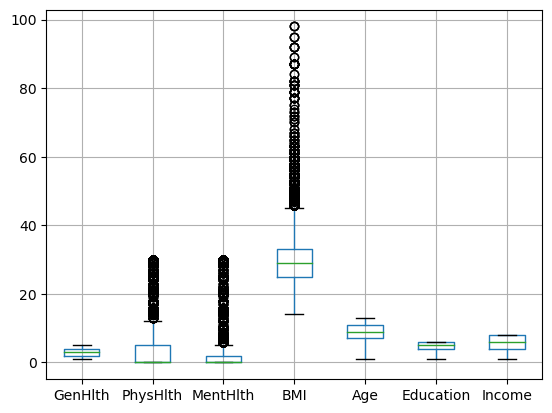

In [6]:
# Boxplots of Ordinal/Continuous Features
data1_sub = data1[['GenHlth','PhysHlth','MentHlth','BMI','Age','Education','Income']]
ax = data1_sub.boxplot()

<h4> Analysis </h4>

Here we see the notable outliers in the dataset 

<h4>PhysHlth and MentHlth</h4>
All the outliers identified seem to fall within the range of 30 days, representing instances where respondents experienced either physical health or mental health complications in the past 30 days. Therefore, these are not true outliers but rather indicative of a right-skewed distribution. Most respondents have encountered complications in the respective categories for 1-5 days, with only a few experiencing durations exceeding 30 days in the last month.
<h4> BMI </h4>
BMI exhibits apparent outliers that significantly surpass the typical BMI scale, where most scales typically only extend to 55, representing Class 3 obesity. In light of this, we will explore log transformations and consider the removal of these outliers to address the skewed distribution of BMI values.

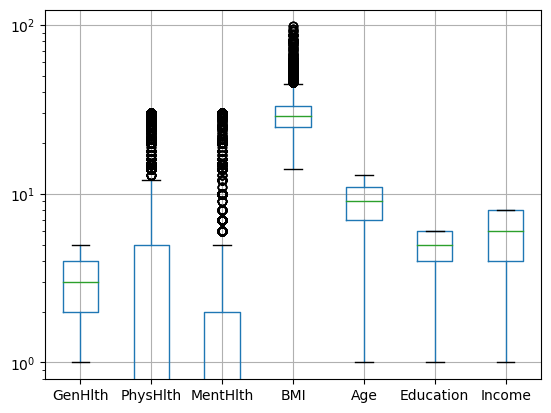

In [7]:
# Log transformed Box Plots
ax = data1_sub.boxplot()
ax.set_yscale('log')

<h4> Analysis </h4> 

Following the log transformation, it is evident that neither Physhlth, Menthlth, nor BMI (true outliers) exhibit a normal distribution. Consequently, we will proceed with outlier removal specifically for the BMI feature.

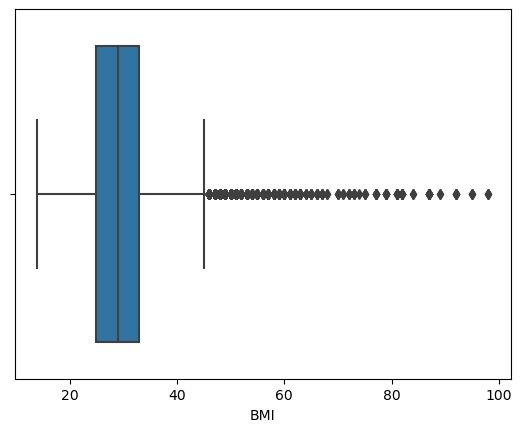

In [8]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI'])
plt.show()

<h4> Analysis </h4>
Here again, is the initial distribution of the BMI variable with outliers exceeding into to 90s 

In [9]:
data1['BMI_transformed'] = np.log(data1['BMI'])

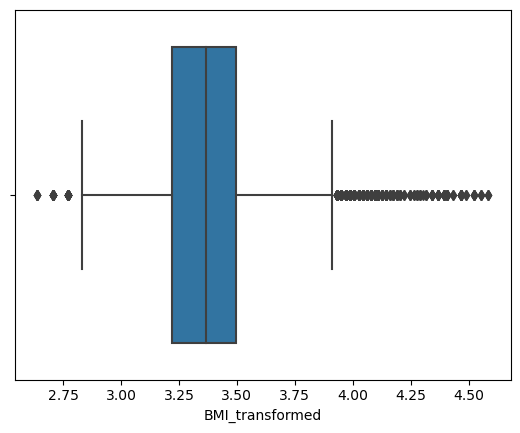

In [10]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI_transformed'])
plt.show()

<h4> Analysis </h4> 
Again, we observe that even after applying a logarithmic transformation to BMI, there are still numerous outliers, including some below the first quartile.

In [11]:
# Drop the transformed BMI column
data1 = data1.drop(columns=['BMI_transformed'])

In [12]:
# Calculate IQR for BMI
Q1 = data1['BMI'].quantile(0.25)
Q3 = data1['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data1['BMI'] < lower_bound) | (data1['BMI'] > upper_bound)

#remove outliers from the DataFrame
data1_cleaned = data1[~outliers]

# Print the identified outliers
print("Outliers:")
print(data1[outliers])

Outliers:
       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
57                 0.0     1.0       1.0        1.0  87.0     1.0     0.0   
73                 0.0     0.0       0.0        1.0  49.0     0.0     0.0   
115                0.0     1.0       1.0        1.0  55.0     0.0     0.0   
166                0.0     0.0       0.0        1.0  50.0     0.0     0.0   
310                0.0     0.0       1.0        1.0  57.0     0.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
29922              1.0     1.0       0.0        1.0  50.0     0.0     0.0   
29926              1.0     1.0       1.0        1.0  55.0     0.0     1.0   
29969              1.0     0.0       1.0        1.0  46.0     0.0     0.0   
29971              1.0     0.0       1.0        1.0  84.0     0.0     0.0   
29984              1.0     1.0       1.0        1.0  64.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealth

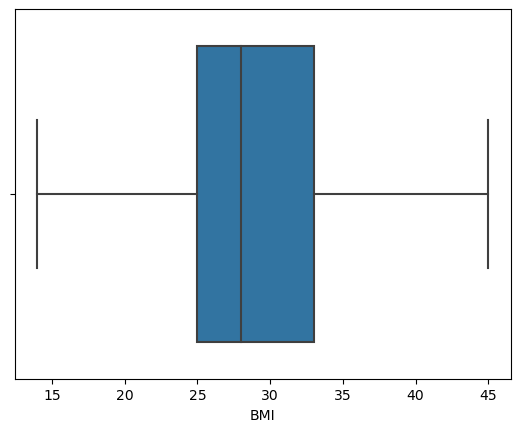

In [13]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1_cleaned['BMI'])
plt.show()

<h4> Analysis </h4>

The preceding boxplot illustrates that, following the removal of outliers using the Interquartile Range (IQR) method, the distribution appears approximately normal, devoid of any outliers.

Distribution of Diabetes_binary:
 Diabetes_binary
0.0    14773
1.0    14289
Name: count, dtype: int64


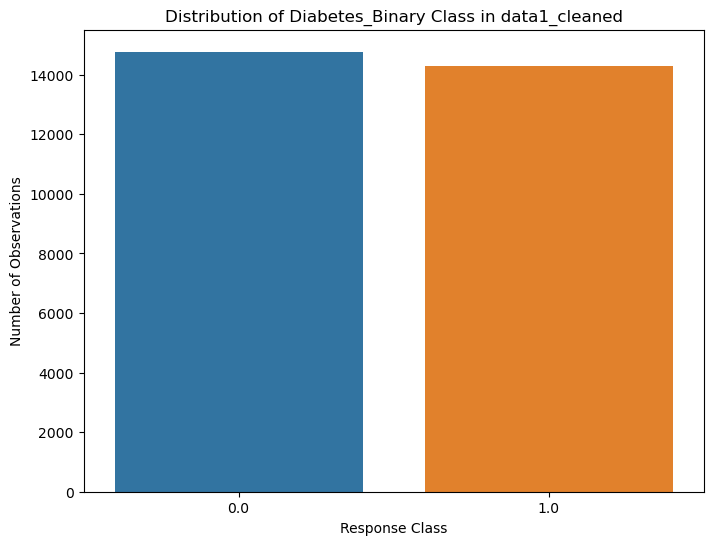

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get the distribution of the response classes
response_counts = data1_cleaned['Diabetes_binary'].value_counts()

# Display the distributions
print("Distribution of Diabetes_binary:\n", response_counts)


# Visualize the distributions using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data1_cleaned)
plt.title("Distribution of Diabetes_Binary Class in data1_cleaned")
plt.ylabel("Number of Observations")
plt.xlabel("Response Class")
plt.show()

<h4> Analysis </h4>

The bar chart above illustrates the updated distribution of our response class after the removal of outliers. With the exclusion of 938 observations, the distribution between the response classes is not precisely 50-50. However, the balance is sufficient to avoid a significant impact on modeling results or introduce substantial skewness.

<H4> Fixing ordinal and categorical variables </H4> 

In consideration of better modeling and the requirements for clustering, it is important to note that four other features in the dataset are currently ordinal. For the purpose of this analysis, we will employ one-hot encoding to transform these ordinal variables, preparing them for use in logistic regression. The utilization of codebooks will guide us in determining the appropriate divisions for these features.
https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook

https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [15]:
# One-hot encode categorical variables
data1_encoded = pd.get_dummies(data1_cleaned, columns=['GenHlth', 'Education', 'Income','Age'])

In [16]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       29062 non-null  float64
 1   HighBP                29062 non-null  float64
 2   HighChol              29062 non-null  float64
 3   CholCheck             29062 non-null  float64
 4   BMI                   29062 non-null  float64
 5   Smoker                29062 non-null  float64
 6   Stroke                29062 non-null  float64
 7   HeartDiseaseorAttack  29062 non-null  float64
 8   PhysActivity          29062 non-null  float64
 9   Fruits                29062 non-null  float64
 10  Veggies               29062 non-null  float64
 11  HvyAlcoholConsump     29062 non-null  float64
 12  AnyHealthcare         29062 non-null  float64
 13  NoDocbcCost           29062 non-null  float64
 14  MentHlth              29062 non-null  float64
 15  PhysHlth              29

<h4> Analysis </h4>

We can observe that when we call 'data1_encoded.info()', the variables have been expanded using one-hot encoding. Notably, the "age" variable has been split into 13 different variables. We will now proceed to determine the corresponding range for each new variable and correctly label them

<H4> Renaming features </H4>

In [17]:
data1_encoded.rename(columns={
    'Income_1.0': 'Income Less than $10,000',
    'Income_2.0': 'Income $10,000 - $14,999',
    'Income_3.0': 'Income $15,000 - $19,999',
    'Income_4.0': 'Income $20,000 - $24,999',
    'Income_5.0': 'Income $25,000 - $34,999',
    'Income_6.0': 'Income $35,000 - $49,999',
    'Income_7.0': 'Income $50,000 - $74,999',
    'Income_8.0': 'Income $75,000 or more',
    'Education_1.0': 'No Formal Education',
    'Education_2.0': 'Elementary School',
    'Education_3.0': 'Some High School',
    'Education_4.0': 'High School Graduate',
    'Education_5.0': 'Some College or Technical School',
    'Education_6.0': 'College or Technical School Graduate',
    'GenHlth_1.0': 'GenHlth_Excellent',
    'GenHlth_2.0': 'GenHlth_VeryGood',
    'GenHlth_3.0': 'GenHlth_Good',
    'GenHlth_4.0': 'GenHlth_Fair',
    'GenHlth_5.0': 'GenHlth_Poor',
    'Sex': 'IsMale',
    'Age_1.0': 'Age_18-24',
    'Age_2.0': 'Age_25-29',
    'Age_3.0': 'Age_30-34',
    'Age_4.0': 'Age_35-39',
    'Age_5.0': 'Age_40-44',
    'Age_6.0': 'Age_45-49',
    'Age_7.0': 'Age_50-54',
    'Age_8.0': 'Age_55-59',
    'Age_9.0': 'Age_60-64',
    'Age_10.0': 'Age_65-69',
    'Age_11.0': 'Age_70-74',
    'Age_12.0': 'Age_75-79',
    'Age_13.0': 'Age_80+',
    
    # Add more renaming as needed
}, inplace=True)

In [18]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Diabetes_binary                       29062 non-null  float64
 1   HighBP                                29062 non-null  float64
 2   HighChol                              29062 non-null  float64
 3   CholCheck                             29062 non-null  float64
 4   BMI                                   29062 non-null  float64
 5   Smoker                                29062 non-null  float64
 6   Stroke                                29062 non-null  float64
 7   HeartDiseaseorAttack                  29062 non-null  float64
 8   PhysActivity                          29062 non-null  float64
 9   Fruits                                29062 non-null  float64
 10  Veggies                               29062 non-null  float64
 11  HvyAlcoholConsump   

<h4> Analysis </h4>

This code chunk replaces the automatically generated variable names from a one-hot encoder with new, more descriptive names that enable better interpretation when we begin examining the weights. All names were the corresponding values based on the study conducted in 2015 https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [19]:
# Split data into arrays
if 'Diabetes_binary' in data1_encoded:
    # Creating copies for the reference set
    y_reference = data1_encoded['Diabetes_binary'].values.copy()
    X_reference = data1_encoded.drop('Diabetes_binary', axis=1).copy().values

    # Creating copies for the cluster set
    y = data1_encoded['Diabetes_binary'].values.copy()
    X = data1_encoded.drop('Diabetes_binary', axis=1).copy().values


<h4> Analysis </h4>
The above code chunk above creates two data sets, a reference set(without cluster) and a cluster set. Both data sets contain the "Diabetes_binary" column as the target variable (y and y_reference), along with the remaining feature variables (X and X_reference). This allows our model to assess clustering without compromising the independence of the original dataframe. It also allows us to compare a model with clusterig to a baseline logistic regression model without the clusters as a feature.

In [132]:
# Get the column names before removing "Diabeties_Binary"
column_names = data1_encoded.columns.tolist()

# Exclude the column "Diabeties_binary"
column_names.remove("Diabetes_binary")

In [21]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reference_scaled = scaler.fit_transform(X_reference)

# Remove column names before clustering
X_no_names = pd.DataFrame(X_scaled, columns=None)


This code chunk scales the data this ensures consistency across features which in turn will speed up computational time of our kmedioids algorithm.

In [22]:
X_no_names.info

<bound method DataFrame.info of              0         1         2         3         4         5         6   \
0     -1.108305 -1.057971  0.156526 -0.372175  1.046284 -0.255048 -0.417343   
1      0.902279  0.945205  0.156526 -0.721810 -0.955764 -0.255048 -0.417343   
2      0.902279 -1.057971  0.156526 -1.421081 -0.955764 -0.255048 -0.417343   
3     -1.108305 -1.057971  0.156526 -1.071445 -0.955764 -0.255048 -0.417343   
4     -1.108305 -1.057971  0.156526 -0.372175 -0.955764 -0.255048 -0.417343   
...         ...       ...       ...       ...       ...       ...       ...   
29057  0.902279  0.945205  0.156526 -0.372175 -0.955764 -0.255048 -0.417343   
29058  0.902279  0.945205  0.156526  0.327096  1.046284 -0.255048 -0.417343   
29059  0.902279  0.945205  0.156526  0.676731 -0.955764 -0.255048 -0.417343   
29060  0.902279 -1.057971  0.156526  1.550819 -0.955764 -0.255048 -0.417343   
29061  0.902279  0.945205  0.156526  0.327096  1.046284 -0.255048 -0.417343   

             7     

Here we see that all the labels were removed this is to ensure that the clustering algorithm does not use the labels to guide its decisons

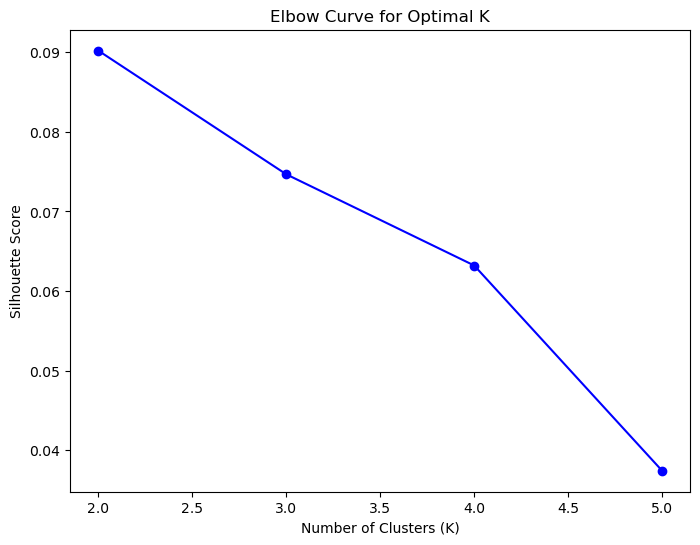

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from gower import gower_matrix

# Subsample 5,000 observations from X_no_names
np.random.seed(8)  # random seed
subsample_indices = np.random.choice(X_no_names.shape[0], 5000, replace=False)
X_subsample = X_no_names.iloc[subsample_indices]

# Calculate Gower's pairwise distances
gower_dist = gower_matrix(X_subsample)

# Iteratively find the optimal number of clusters using the elbow method
max_clusters = 5  # Set the maximum number of clusters to try
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='precomputed')
    cluster_assignments = kmedoids.fit_predict(gower_dist)
    silhouette_avg = silhouette_score(gower_dist, cluster_assignments, metric='precomputed')
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters using the elbow method
optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because k starts from 2

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
print("Optimal Number of Clusters:", optimal_clusters)

Optimal Number of Clusters: 2


<h4> Analysis </h4>

Looking at the above elbow curve which is not exactly like the same as an ellucidean distance curve we are intersted in a higher silhouett score we see that as cluster increase score decrease notably no score is good with two clusters having a score of 0.09. This may be due to there being two clases for the response but due to the relatively low score we are doubtfull that it is. as a low score indicates its hard to defrentiate between the clusters. 

In [28]:
#reset gowers distance to whole dataset
gower_dist = gower_matrix(X_no_names)

# Apply K-Medoids clustering to the entire dataset
kmedoids_final = KMedoids(n_clusters=optimal_clusters, random_state=8, metric='precomputed')
cluster_assignments_final = kmedoids_final.fit_predict(gower_dist)

# Add new features based on cluster assignments to the original dataset
data1_encoded['Cluster'] = cluster_assignments_final

The code above uses the Gower distance matrix on our dataset in order to measure similarity between the rows. Then, using K-medoids clustering on this matrix, we can minimizes the sum of pairwise dissimilarties between points in a cluster and a point designated as the center of that cluster. The number of clusters is specified by the variable optimal_clusters. After clustering, the code assigns each data point to a cluster, and these cluster assignments are added as a new column ('Cluster') to the original dataframe data1_encoded.

In [133]:
X_no_names.reset_index(drop=True, inplace=True)
data1_encoded.reset_index(drop=True, inplace=True)
X_no_names["Cluster"] = data1_encoded["Cluster"]

In [134]:
# Adding column labels to X_no_labels
X_no_names.columns = column_names

# Now X_no_labels has column labels
print(X_no_names)

         HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0     -1.108305 -1.057971   0.156526 -0.372175  1.046284 -0.255048   
1      0.902279  0.945205   0.156526 -0.721810 -0.955764 -0.255048   
2      0.902279 -1.057971   0.156526 -1.421081 -0.955764 -0.255048   
3     -1.108305 -1.057971   0.156526 -1.071445 -0.955764 -0.255048   
4     -1.108305 -1.057971   0.156526 -0.372175 -0.955764 -0.255048   
...         ...       ...        ...       ...       ...       ...   
29057  0.902279  0.945205   0.156526 -0.372175 -0.955764 -0.255048   
29058  0.902279  0.945205   0.156526  0.327096  1.046284 -0.255048   
29059  0.902279  0.945205   0.156526  0.676731 -0.955764 -0.255048   
29060  0.902279 -1.057971   0.156526  1.550819 -0.955764 -0.255048   
29061  0.902279  0.945205   0.156526  0.327096  1.046284 -0.255048   

       HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  Age_40-44  \
0                 -0.417343      0.638195  0.790185  0.519800  ...  -0.228075 

Here we are reintegrating the labels into X_no_names before proceeding with the modeling, and augmenting the dataframe by incorporating the cluster feature.

<h2> Data Understanding 2 </h2>


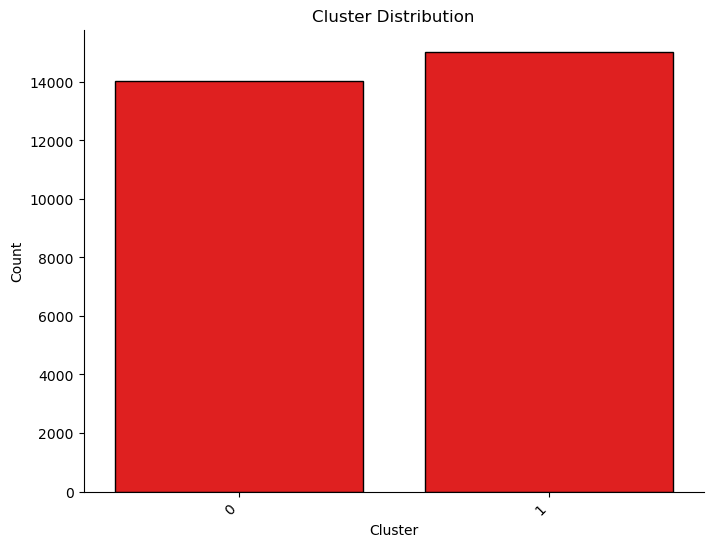

Distribution of clusters:
 Cluster
1    15035
0    14027
Name: count, dtype: int64


In [102]:
# High Blood Pressure
grouped_data = data1_encoded.groupby('Cluster').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Cluster', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("Cluster Distribution")
ax.set_xlabel("Cluster")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # To give a similar appearance to theme_economist()

plt.show()

# Get the distribution of the response classes
response_counts = data1_encoded['Cluster'].value_counts()

# Display the distributions
print("Distribution of clusters:\n", response_counts)

<h4>Cluster Distribution</h4>

Cluster 0 has 14,027 values (48% of the dataset), while Cluster 1 has 15,035 values (52% of the dataset).
29062. This is very close to the distribution of our response variable – No Diabetes has 14,773 values (50.8% of the dataset), while Diabetes has 14,289 values(49.2% of the dataset). This alone does not signify that the clustering is correctly splitting the data into “No Diabetes” and “Diabetes,” but it does give us confidence that the new Logistic Regression model we fit will not suffer from bias issues. We will take a closer look comparing the distributions of the features between the response variable and the clustering model.


<H3>Most Important Attributes for Logistic Regression Model (From Lab 2)</H3>
<H3>Features that increased the probability of being classified as having prediabeties or diabetes </H3>
<B> BMI (Baseline Logistic Regression Weight: 0.499)</B>


The Box Plots for BMI between the Response Variable and the Cluster Variable are very similar to each other – For both “Cluster 0” and “No Diabetes,” the median is 27. For both “Cluster 1” and “Diabetes,” the median is 30. Visually it is apparent that the two distributions have remarkedly similar quartiles, which indicates that “Cluster 0” and “No Diabetes” use the same important features, and likewise for “Cluster 1” and “Diabetes.”

   Diabetes_binary    Avg_BMI
0              0.0  27.397888
1              1.0  30.918609


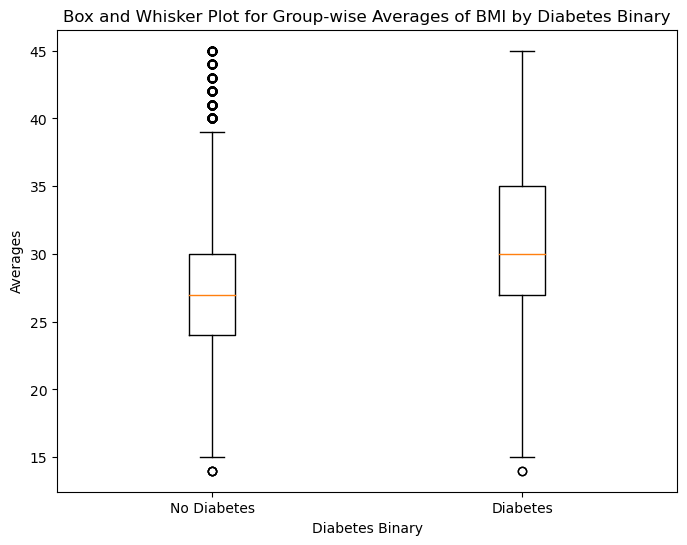

   Cluster    Avg_BMI
0        0  27.964853
1        1  30.214965


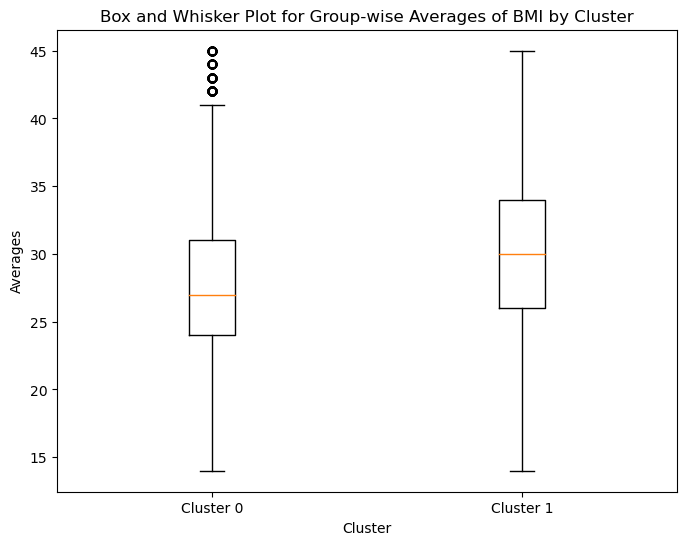

In [142]:
import matplotlib.pyplot as plt

# Group-wise Average for Response Variable
grouped_avg_response = data1_encoded.groupby('Diabetes_binary').agg({'BMI': 'mean'}).reset_index()
grouped_avg_response.columns = ['Diabetes_binary', 'Avg_BMI']
print(grouped_avg_response)

# Box and whisker plot for group-wise averages of the response variable
plt.figure(figsize=(8, 6))

# Assuming 'Diabetes_binary' is a binary categorical variable (0 or 1)
# Replace it with your actual column name if needed

plt.boxplot([data1_encoded[data1_encoded['Diabetes_binary'] == 0]['BMI'],
             data1_encoded[data1_encoded['Diabetes_binary'] == 1]['BMI']],
            labels=['No Diabetes', 'Diabetes'])

plt.xlabel('Diabetes Binary')
plt.ylabel('Averages')
plt.title('Box and Whisker Plot for Group-wise Averages of BMI by Diabetes Binary')

plt.show()

# Group-wise Averages for Cluster
grouped_avg_cluster = data1_encoded.groupby('Cluster').agg({'BMI': 'mean'}).reset_index()
grouped_avg_cluster.columns = ['Cluster', 'Avg_BMI']
print(grouped_avg_cluster)

# Box and whisker plot for group-wise averages of the cluster variable
plt.figure(figsize=(8, 6))

plt.boxplot([data1_encoded[data1_encoded['Cluster'] == 0]['BMI'],
             data1_encoded[data1_encoded['Cluster'] == 1]['BMI']],
            labels=['Cluster 0', 'Cluster 1'])

plt.xlabel('Cluster')
plt.ylabel('Averages')
plt.title('Box and Whisker Plot for Group-wise Averages of BMI by Cluster')

plt.show()


<B> HighBP (Baseline Logistic Regression Weight: 0.335) and HighChol (Baseline Logistic Regression Weight: 0.249) </B>

When comparing how similar the Clustering variable and the Response variable using groupwise averages, we can see that we have similar results for High Blood Pressure and High Cholesterol. 

For High Blood Pressure, both “Cluster 0” and “No Diabetes” have an average between 0.3-0.4, and “Cluster 1” and “Diabetes” have an average between 0.7-0.8. 

Likewise, for High Cholesterol, both “Cluster 0” and “No Diabetes” have an average between 0.3-0.4, and “Cluster 1” and “Diabetes” have an average between 0.6-0.7.


   Diabetes_binary  Avg_HighBP  Avg_HighChol
0              0.0    0.366412      0.390510
1              1.0    0.742319      0.670446
   Cluster  Avg_HighBP  Avg_HighChol
0        0    0.317459      0.320382
1        1    0.769338      0.721982


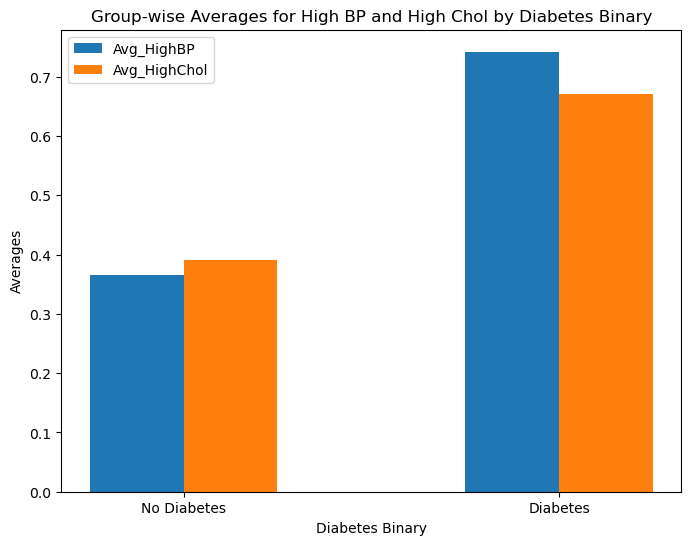

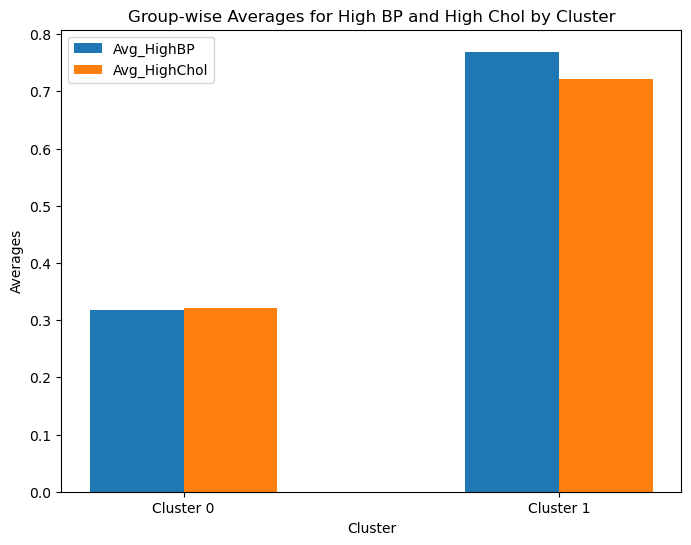

In [141]:
#Group-wise Averages for Response Variable
grouped_avg_response = data1_encoded.groupby('Diabetes_binary').agg({'HighBP': 'mean', 'HighChol': 'mean'}).reset_index()
grouped_avg_response.columns = ['Diabetes_binary', 'Avg_HighBP', 'Avg_HighChol']
print(grouped_avg_response)

#Bar plot for group-wise averages of the response variable
plt.figure(figsize=(8, 6))

bar_width = 0.25  # Adjusted bar width for better visualization
index_response = grouped_avg_response['Diabetes_binary']
bar1 = plt.bar(index_response + bar_width, grouped_avg_response['Avg_HighBP'], bar_width, label='Avg_HighBP')
bar2 = plt.bar(index_response + 2 * bar_width, grouped_avg_response['Avg_HighChol'], bar_width, label='Avg_HighChol')

plt.xlabel('Diabetes Binary')
plt.ylabel('Averages')
plt.title('Group-wise Averages for High BP and High Chol by Diabetes Binary')
plt.xticks(index_response + 1.5 * bar_width, ['No Diabetes', 'Diabetes'])
plt.legend()

#Group-wise Averages for Cluster
grouped_avg_cluster = data1_encoded.groupby('Cluster').agg({'HighBP': 'mean', 'HighChol': 'mean'}).reset_index()
grouped_avg_cluster.columns = ['Cluster', 'Avg_HighBP', 'Avg_HighChol']
print(grouped_avg_cluster)
#Bar plot for group-wise averages of the cluster variable
plt.figure(figsize=(8, 6))

bar_width = 0.25  # Adjusted bar width for better visualization
index_cluster = grouped_avg_cluster['Cluster']
bar1 = plt.bar(index_cluster + bar_width, grouped_avg_cluster['Avg_HighBP'], bar_width, label='Avg_HighBP')
bar2 = plt.bar(index_cluster + 2 * bar_width, grouped_avg_cluster['Avg_HighChol'], bar_width, label='Avg_HighChol')

plt.xlabel('Cluster')
plt.ylabel('Averages')
plt.title('Group-wise Averages for High BP and High Chol by Cluster')
plt.xticks(index_cluster + 1.5 * bar_width, ['Cluster 0', 'Cluster 1'])
plt.legend()

plt.show()


<H3> Features that decreased the probability of being classified as having prediabeties or diabetes </H3>
<B> GenHlth_Excellent (Baseline Logistic Regression Weight: -0.434) and GenHlth_VeryGood (Baseline Logistic Regression Weight: -0.294)</B>

When comparing how similar the Clustering variable and the Response variable using groupwise averages, we can see that we have similar results for General Health. For Very Good General Health, both “Cluster 0” and “No Diabetes” have an average between 0.35-0.5, and “Cluster 1” and “Diabetes” have an average between 0.1-0.17. 

For Excellent General Health, the Clusters are more similar to the response variable, with “Cluster 0” and “No Diabetes” both having an average of 0.2, and “Cluster 1” and “Diabetes” having an average around 0.5


   Diabetes_binary  Avg_GenHlth_Excellent  Avg_GenHLth_VeryGood
0              0.0               0.203818              0.376972
1              1.0               0.033732              0.187347
   Cluster  Avg_GenHlth_Excellent  Avg_GenHLth_VeryGood
0        0               0.190490              0.492051
1        1               0.054606              0.089391


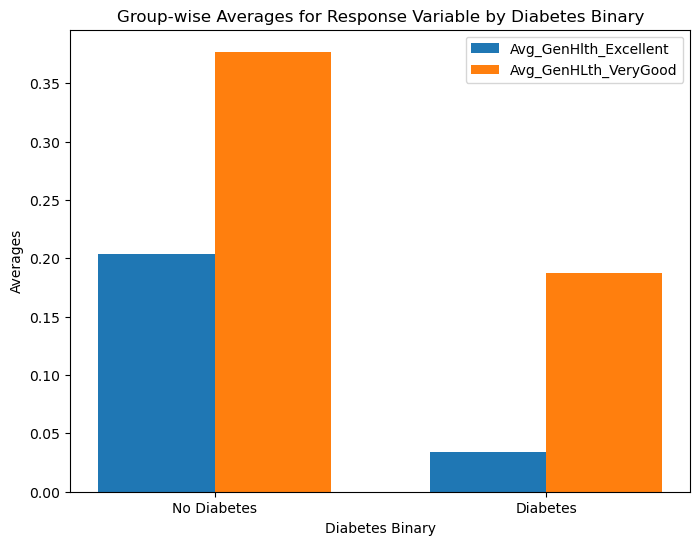

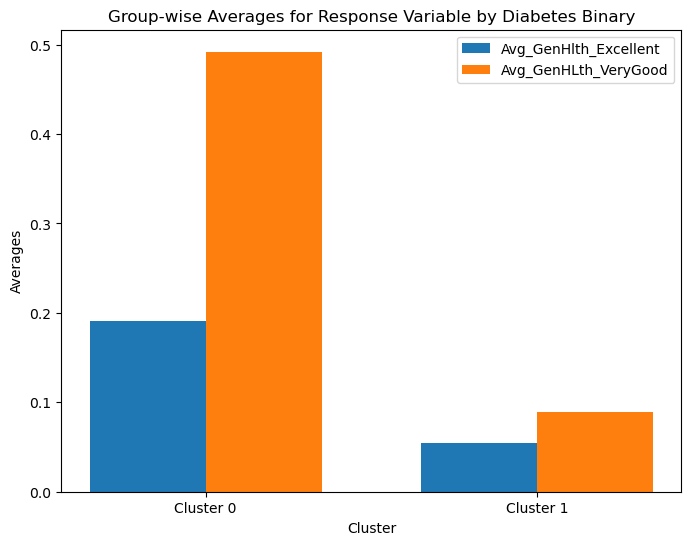

In [105]:
# Group-wise Averages for Response Variable
grouped_avg = data1_encoded.groupby('Diabetes_binary').agg({'GenHlth_Excellent': 'mean', 'GenHlth_VeryGood': 'mean'}).reset_index()
grouped_avg.columns = ['Diabetes_binary', 'Avg_GenHlth_Excellent', 'Avg_GenHLth_VeryGood']
print(grouped_avg)

# Bar plot for group-wise averages
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = grouped_avg['Diabetes_binary']
bar1 = plt.bar(index, grouped_avg['Avg_GenHlth_Excellent'], bar_width, label='Avg_GenHlth_Excellent')
bar2 = plt.bar(index + bar_width, grouped_avg['Avg_GenHLth_VeryGood'], bar_width, label='Avg_GenHLth_VeryGood')

plt.xlabel('Diabetes Binary')
plt.ylabel('Averages')
plt.title('Group-wise Averages for Response Variable by Diabetes Binary')
plt.xticks(index + bar_width / 2, ['No Diabetes', 'Diabetes'])
plt.legend()

# Group-wise Averages for Cluster
grouped_avg = data1_encoded.groupby('Cluster').agg({'GenHlth_Excellent': 'mean', 'GenHlth_VeryGood': 'mean'}).reset_index()
grouped_avg.columns = ['Cluster', 'Avg_GenHlth_Excellent', 'Avg_GenHLth_VeryGood']
print(grouped_avg)

# Bar plot for group-wise averages
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = grouped_avg['Cluster']
bar1 = plt.bar(index, grouped_avg['Avg_GenHlth_Excellent'], bar_width, label='Avg_GenHlth_Excellent')
bar2 = plt.bar(index + bar_width, grouped_avg['Avg_GenHLth_VeryGood'], bar_width, label='Avg_GenHLth_VeryGood')

plt.xlabel('Cluster')
plt.ylabel('Averages')
plt.title('Group-wise Averages for Response Variable by Diabetes Binary')
plt.xticks(index + bar_width / 2, ['Cluster 0', 'Cluster 1'])
plt.legend()

<h2> Model and Evaluation 1</h2>

Now that we have two seperate sets of our response variable stored in "y" and "y_reference" , as well as two sets of our scaled features stored in "X_no_names" and "X_reference" we will now apply a 10 fold cv and proceed to fit and tune our new model utilizing the cluster feature. Note we did not need to use two seperate arrays for our response but did so for consistency. It is also important to mention we have previously hypertuned the baseline model so in order to save computational time we will simply fit a model with our previous best perams.

In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

random_seed = 8  
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

# Lists to store cross-validation scores for different models (Diabetes)
cross_val_scores_lr = []
cross_val_scores_lr_rf = []

<h4> Fit intitial Logistic Regression model with "Cluster" as a feature </h4>

In [120]:
for train_index, test_index in kfold.split(X_no_names, y):
    X_train, X_test = X_no_names.iloc[train_index], X_no_names.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and fit the Logistic Regression model
    lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    recall_lr = recall_score(y_test, y_pred_lr)
    cross_val_scores_lr.append(recall_lr)

In [121]:
print("Cross-Validation Recall Scores (Logistic Regression):", cross_val_scores_lr)

Cross-Validation Recall Scores (Logistic Regression): [0.7593984962406015, 0.7643004824259132, 0.7805049088359046, 0.7559055118110236, 0.7739916550764951, 0.7661895023858214, 0.7678571428571429, 0.7792479108635098, 0.7721872816212438, 0.7601449275362319]


<h4> Analysis </h4>


The cross-validation recall scores for the Logistic Regression model, ranging from approximately 0.76 to 0.78, indicate a consistently moderate to high ability of the model to correctly identify positive classes. This consistency across different folds suggests that the model generalizes well to different subsets of the data.

<h4> Fit Best Logistic Regression model from previous lab as baseline </h4>

In [122]:
for train_index, test_index in kfold.split(X_reference, y_reference):
    X_train_rf, X_test_rf = X_reference[train_index], X_reference[test_index]
    y_train_rf, y_test_rf = y_reference[train_index], y_reference[test_index]
    
    # Initialize and fit the Logistic Regression model
    lr_rf = LogisticRegression(penalty='l1', C=0.1, class_weight=None, solver='liblinear')
    lr_rf.fit(X_train_rf, y_train_rf)
    y_pred_lr_rf = lr_rf.predict(X_test_rf)  # Fix the variable name here
    recall_lr_rf = recall_score(y_test_rf, y_pred_lr_rf)
    cross_val_scores_lr_rf.append(recall_lr_rf)

In [123]:
print("Cross-Validation Recall Scores (Logistic Regression):", cross_val_scores_lr_rf)

Cross-Validation Recall Scores (Logistic Regression): [0.7559808612440191, 0.7629221226740179, 0.7854137447405329, 0.7566213314244811, 0.7753824756606398, 0.7682344921608726, 0.7664285714285715, 0.7792479108635098, 0.7721872816212438, 0.758695652173913]


<h4> Analysis </h4>

The cross-validation recall scores for the optimized Logistic Regression model are also in the range of approximately 0.76 to 0.79, similar to the initial model. These scores demonstrate a consistent performance in correctly identifying positive cases across different subsets of the data. The slight variations in recall scores across the folds suggest that the model is stable and reliable, with a good balance between sensitivity and generalization.

<h4> Hypertune Parameters using Grid Search </h4>

In [46]:

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(max_iter=2000)
# Define GridSearch for each model
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=kfold, scoring='recall')


grid_search_lr.fit(X_train, y_train)

# Get best parameters
best_params_lr = grid_search_lr.best_params_

print("Best Parameters for Logistic Regression:")
print(best_params_lr)

Best Parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


<h4> Analysis </h4>


The cross-validation recall scores for the optimized Logistic Regression model are also in the range of approximately 0.76 to 0.79, similar to the initial model. These scores demonstrate a consistent performance in correctly identifying positive cases across different subsets of the data. The slight variations in recall scores across the folds suggest that the model is stable and reliable, with a good balance between sensitivity and generalization.

<h4> Refit the Model </h4>

In [124]:
#create array to store new cross vall scores
cross_val_scores_lr2 = []

for train_index, test_index in kfold.split(X_no_names, y):
    X_train, X_test = X_no_names.iloc[train_index], X_no_names.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and fit the Logistic Regression model
    lr = LogisticRegression(penalty='l1', C=0.1, class_weight=None, solver='liblinear')
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    recall_lr = recall_score(y_test, y_pred_lr)
    cross_val_scores_lr2.append(recall_lr)
    db_lr= lr # save final model for use later

In [125]:
print("Cross-Validation Recall Scores (Logistic Regression):", cross_val_scores_lr2)

Cross-Validation Recall Scores (Logistic Regression): [0.758714969241285, 0.766368022053756, 0.7819074333800842, 0.7559055118110236, 0.7726008344923505, 0.7668711656441718, 0.7678571428571429, 0.7792479108635098, 0.7728860936408106, 0.7608695652173914]


<h4> Analysis </h4>

After refitting the Logistic Regression model using 10-fold cross-validation and the hypertuned parameters, we achieved recall scores ranging from approximately 0.76 to 0.78. These consistent results suggest the model is reliably identifying positive classes across different data subsets, indicating good generalization. The choice of hyperparameters ('penalty': 'l1', 'C': 0.1, and 'solver': 'liblinear') appears well-suited for this dataset.

<h3> Hypertune Threshold to get 90% recall on both models </h3>

Logistic (lr_rf) Threshold @ 0.90 Recall: 0.35
Logistic (db_lr) Threshold @ 0.90 Recall: 0.34


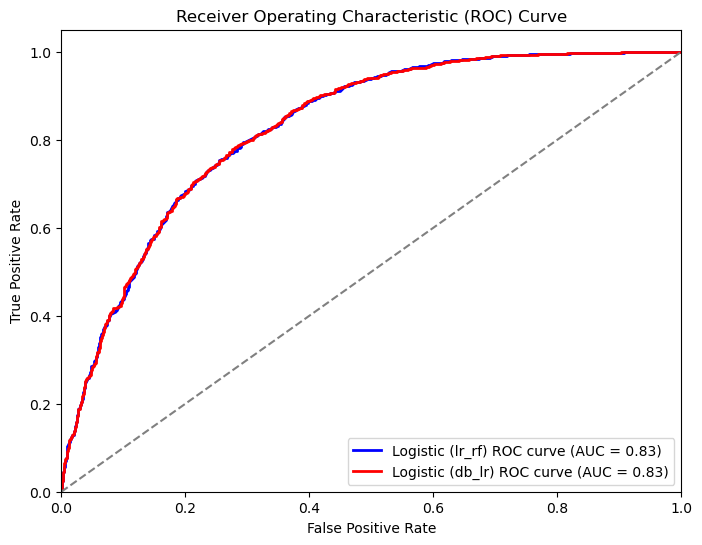

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_lr_rf_prob = lr_rf.predict_proba(X_test_rf)[:, 1]
y_pred_db_lr_prob = db_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression (lr_rf)
fpr_lr_rf, tpr_lr_rf, thresholds_lr_rf = roc_curve(y_test_rf, y_pred_lr_rf_prob)
roc_auc_lr_rf = roc_auc_score(y_test_rf, y_pred_lr_rf_prob)

# Calculate ROC curve and AUC for the other Logistic Regression (db_lr)
fpr_db_lr, tpr_db_lr, thresholds_db_lr = roc_curve(y_test, y_pred_db_lr_prob)
roc_auc_db_lr = roc_auc_score(y_test, y_pred_db_lr_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_rf, tpr_lr_rf, color='blue', lw=2, label=f'Logistic (lr_rf) ROC curve (AUC = {roc_auc_lr_rf:.2f})')
plt.plot(fpr_db_lr, tpr_db_lr, color='red', lw=2, label=f'Logistic (db_lr) ROC curve (AUC = {roc_auc_db_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Find the threshold for a specific recall rate (e.g., 0.90) for each model
desired_recall = 0.90
threshold_lr_rf = thresholds_lr_rf[np.argmax(tpr_lr_rf >= desired_recall)]
threshold_db_lr = thresholds_db_lr[np.argmax(tpr_db_lr >= desired_recall)]

# Print the threshold for each model
print(f'Logistic (lr_rf) Threshold @ {desired_recall:.2f} Recall: {threshold_lr_rf:.2f}')
print(f'Logistic (db_lr) Threshold @ {desired_recall:.2f} Recall: {threshold_db_lr:.2f}')

plt.show()


<h4> Analysis </h4>

The code was created by providing Chat-GPT with our original ROC curve data and requesting it to extract the thresholds needed for each model to achieve a 0.90 recall. We will now refit the models using these specific thresholds. It's noteworthy that both models have the exact same AUC, although their thresholds differ slightly.

In [57]:
# Define the thresholds
threshold_lr_rf = 0.35
threshold_db_lr = 0.34

# Apply custom thresholds
y_pred_lr_rf_custom = (y_pred_lr_rf_prob >= threshold_lr_rf).astype(int)
y_pred_db_lr_custom = (y_pred_db_lr_prob >= threshold_db_lr).astype(int)

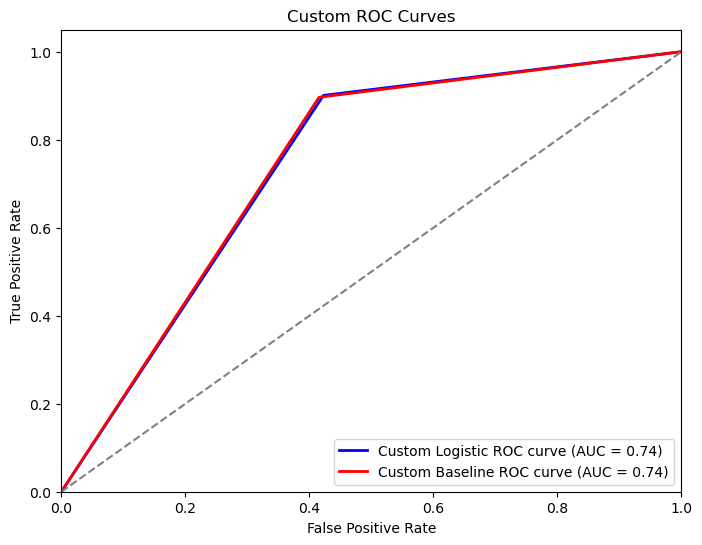

In [60]:
# Calculate the ROC curve for Logistic Regression( with cluster)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_db_lr_custom)
roc_auc_lr = roc_auc_score(y_test, y_pred_db_lr_custom)

# Calculate the ROC curve for the reference model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_lr_rf_custom)
roc_auc_rf = roc_auc_score(y_test, y_pred_lr_rf_custom)


# Plot ROC curves for the models with custom thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Custom Logistic ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Custom Baseline ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Custom ROC Curves')
plt.legend(loc='lower right')
plt.show()

<h2> Model and Evaluation 2 </h2>

Now that we have our two models, along with their recall and AUC metrics, we will comprehensively evaluate their performance. This section will delve into the assessment of not only the model performance but also the effectiveness of the clusters.this section will go as the following:

- <h4> Evaluate K-Medoids Clusters via Silhouette Score:</h4>

    Utilize the silhouette score to assess the quality and cohesion of the clusters formed by the K-Medoids algorithm.
- <h4>Compare Important Coefficients in Both Baseline and Logistic Models, Including Cluster as a Feature:</h4>

    Analyze the essential coefficients in both the baseline and logistic regression models. Consider the addition of the cluster assignment as a feature and observe how it influences the model's decision boundaries.
- <h4>Compare Recall Metrics of the Baseline and Initial/Tuned New Model:</h4>

    Contrast the recall scores of the baseline model with those of the initial and tuned new logistic regression models. 
- <h4> Discuss AUC Score Pre and Post Threshold Change </h4>

    Explore the area under the ROC curve (AUC) scores before and after the threshold adjustment.
- <h4>Compare Adjusted Threshold Models' Mean Precision Score Over 10-Fold Cross-Validation: </h4>

    Conduct a thorough comparison of the mean Precision scores over a 10-fold cross-validation for models with adjusted thresholds. This will provide us with valuable information on the robustness of the models with the adjusted threshold, and tell us if the tradeoff was worth the boost in recall

- <h4>Additional Comparisons and Evaluation Conclusions</h4>

In [63]:
# Calculate silhouette score
silhouette_avg_final = silhouette_score(gower_dist, cluster_assignments_final, metric='precomputed')

print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg_final:.4f}")

Silhouette Score for 2 clusters: 0.1095


<h4>Analysis</h4>


The silhouette score for our two clusters suggests a moderate quality, indicating that the clusters are reasonably defined. However, its proximity to 0 raises concern about potential overlap, suggesting difficulty in distinguishing between the two clusters. This is particularly significant, as it implies that the clusters might not serve as effective features for predicting the response, given their entangled nature.

Notably, our initial assumption of two clusters aligning with the binary nature of the response variable (diabetes binary) was challenged when we examined the silhouette score. It suggests that the identified clusters may not be optimal fits. Consequently, adding more clusters might exacerbate the challenge of differentiation. This could be attributed to the predominant boolean nature of the data, with values such as "yes" and "no." Although we employed Gower's distance to accommodate this, it's plausible that the complexity of the data was not adequately captured, or these features might inherently lack separability. 

<h3> Coefficent Comparison </h3>

<h4> Model with Clusters </h4>

In [112]:
# Exclude "diabetes binary" from variable_names
variable_names = data1_encoded.columns[data1_encoded.columns != "Diabetes_binary"]

# iterate over the coefficients
weights = db_lr.coef_.T 
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

HighBP has weight of 0.33270135221093683
HighChol has weight of 0.25987791451773806
CholCheck has weight of 0.19442679545350836
BMI has weight of 0.5006307199826903
Smoker has weight of -0.015877374463816447
Stroke has weight of 0.0376056033827742
HeartDiseaseorAttack has weight of 0.07544328377135741
PhysActivity has weight of -0.0009543825681397616
Fruits has weight of -0.0074283466863075635
Veggies has weight of -0.007316303319778397
HvyAlcoholConsump has weight of -0.16769568509579963
AnyHealthcare has weight of 0.006232129757587723
NoDocbcCost has weight of -0.02827196773193672
MentHlth has weight of -0.026679755423914545
PhysHlth has weight of -0.0301934876618151
DiffWalk has weight of 0.052126315444292345
IsMale has weight of 0.15242201439953562
GenHlth_Excellent has weight of -0.4678174176428076
GenHlth_VeryGood has weight of -0.290402739506883
GenHlth_Good has weight of 0.0
GenHlth_Fair has weight of 0.18031180115842552
GenHlth_Poor has weight of 0.16540759769376842
No Formal 

<h4> Analysis </h4>

Adding the cluster feature to the Logistic Regression Model produced very similar results to the baseline Logistic Regression Model. The Clustering feature itself zeroed out its coefficient, but it did slightly change the coefficients from the baseline, though only by the 10^-4 place in most cases. 

Like the baseline, the most important features that increase the outcome of Diabetes as the response variable are BMI, High Blood Pressure, and High Cholesterol. The most important features that decreased the outcome of diabetes were Excellent and Very Good General Health, Age under 55, income over $35k, and Heavy Alcohol Consumption. The remaining variables had little to no effect on the response variable outcome.


<h4> Baseline Model </h4>

In [114]:
# Exclude "Diabetes_binary" and "Cluster" from variable_names
variable_names_rf = data1_encoded.columns[~data1_encoded.columns.isin(["Diabetes_binary", "Cluster"])]

# iterate over the coefficients
weights = lr_rf.coef_.T 
for coef, name in zip(weights,variable_names_rf):
    print(name, 'has weight of', coef[0])

HighBP has weight of 0.3327092967964641
HighChol has weight of 0.25986436895811454
CholCheck has weight of 0.19444390225196378
BMI has weight of 0.5005966958734765
Smoker has weight of -0.015871566774324625
Stroke has weight of 0.03761216160319085
HeartDiseaseorAttack has weight of 0.07547905036974734
PhysActivity has weight of -0.0009675548638445094
Fruits has weight of -0.007413932606439515
Veggies has weight of -0.0073056404369218194
HvyAlcoholConsump has weight of -0.16770323616688015
AnyHealthcare has weight of 0.006254046491036064
NoDocbcCost has weight of -0.028306251727310744
MentHlth has weight of -0.02671466835789649
PhysHlth has weight of -0.030179574991146454
DiffWalk has weight of 0.05213684252377115
IsMale has weight of 0.15242693127851953
GenHlth_Excellent has weight of -0.46779540118995266
GenHlth_VeryGood has weight of -0.2903879324377962
GenHlth_Good has weight of 0.0
GenHlth_Fair has weight of 0.18029110079945615
GenHlth_Poor has weight of 0.1653720563668601
No Forma

<h4> Analysis </h4>


The most important features that increase the outcome of Diabetes as the response variable are BMI, High Blood Pressure, and High Cholesterol. The most important features that decreased the outcome of diabetes were Excellent and Very Good General Health, Age under 55, income over $35k, and Heavy Alcohol Consumption. The remaining variables had little to no effect on the response variable outcome.

<h3> In Comparison </h3>

<H3> Feature Importance between Models </H3>

The comparison between the model with clusters and the baseline logistic regression model reveals intriguing consistencies and disparities. Both models underscore the pivotal role of BMI, with a substantial positive weight (0.5006) in predicting diabetes. HighBP, HighChol, and specific age groups consistently exhibit positive weights, signaling increased diabetes risk across both approaches. Similarly, certain health indicators, such as GenHlth_Excellent and GenHlth_VeryGood, consistently showcase negative weights, suggesting potential protective effects. Notably, the absence of weights for certain education and income categories is a shared finding, indicating limited influence on diabetes prediction in both models. However, the model with clusters introduces the cluster variable, which, as observed, doesn't significantly contribute to predictive accuracy. This consistency in key predictors across models enhances our confidence in the reliability of factors influencing diabetes prediction, while the disparities prompt further exploration into the utility of the cluster variable and its impact on model performance.

<H3>Features that increased the probability of being classified as having prediabeties or diabetes </H3>

<B> BMI (Clustered LR Model Weight: 0.501, Logistic Regression Weight: 0.501)</B>

Body Mass Index is a measure of weight as related to height, which has association with diabetes due to how it measures obesity, which is one of the most well known effects of diabetes. We must also consider that there is a difference in obesity between Type 1 and Type 2 diabetes, which means that if we were only looking at Type 2 diabetics, BMI may have even greater feature importance. It is still the attribute with the highest Logistic Regression coefficient weight, so the nuance between types of diabetes is just something to keep in mind.

<B> HighBP (Clustered LR Model Weight: 0.333, Baseline Logistic Regression Weight: 0.333) and HighChol (Clustered LR Model Weight:0.260 , Baseline Logistic Regression Weight: 0.260) </B>

High blood pressure (HighBP) and High Cholesterol (HighChol) also increases the probability of the positive class. Individuals with high blood pressure and/or high cholesterol are more likely to have diabetes. This is because diabetes damages the small blood vessels in your body over time, which causes the walls of the blood vessels to stiffen. This increases pressure, which leads to the condition of high blood pressure. Diabetes also damages the lining of your arteries, which means it's more likely that cholesterol will stick to them, making them narrow or even blocked – which can also increase blood pressure.

<H3> Features that decreased the probability of being classified as having prediabeties or diabetes </H3>

<B> GenHlth_Excellent (Clustered LR Model Weight: 0.-468, Baseline Logistic Regression Weight: -0.468) and GenHlth_VeryGood (Clustered LR Model Weight: 0.290, Logistic Regression Weight: -0.290)</B>

In the Logistic Regression Model, having excellent general health is associated with a decreased probability of having diabetes. Similarly, the ‘Very Good’ levels of general health also has a negative coefficient, indicating that better general health is associated with a reduced likelihood of the outcome. Someone’s excellent health has higher feature importance to the model because it’s likely that the other health variables like “high blood pressure” are negative, so the model relies heavier on the general health factor to predict non-diabetes. 

<B> Age below 55 (Clustered LR Model Weight: 0.168, Baseline Logistic Regression Weight: -0.168 at Age 18-24) and other “Age” variables below 55 </B>

Since ages 18-54 variables have negative coefficients, an increase in age up to 55 decreases the probability of the individual having diabetes. Since other health variables are associated with higher ages, it makes sense that the model relies more on variables like high cholesterol and high blood pressure as age increases. 

<B> Income greater than 35k (Clustered LR Model Weight: -0.107, Baseline Logistic Regression Weight: -0.108 at >75K) </B>

Higher Income categories also have negative coefficients, suggesting that higher income levels are associated with a reduced probability of having diabetes. This could indicate that individuals with higher income are less likely to have the outcome being predicted.

<B> HvyAlcoholConsump (Clustered LR Model Weight: -0.168, Baseline Logistic Regression Weight: -0.168) </B>

Heavy alcohol consumption decreases the probability of the positive class. Individuals who consume alcohol heavily are less likely to be classified as having diabetes. It is reasonable to assume that this is an effect of a diabetes diagnosis because diabetics are often told by doctors to avoid heavy drinking, because it can cause ketoacidosis (which is life-threatening) and hypertriglyceridemia (which greatly increases the risk of heart disease). 


<H3> Recall Comparison </H3>

<h4> Model's Mean Recall Score </h4>

In [80]:
Initial_new_scores = [0.7593984962406015, 0.7643004824259132, 0.7805049088359046, 0.7559055118110236, 0.7739916550764951, 0.7661895023858214, 0.7678571428571429, 0.7792479108635098, 0.7721872816212438, 0.7601449275362319]
Tuned_new_scores = [0.758714969241285, 0.766368022053756, 0.7819074333800842, 0.7559055118110236, 0.7726008344923505, 0.7668711656441718, 0.7678571428571429, 0.7792479108635098, 0.7728860936408106, 0.7608695652173914]
Reference_scores = [0.7559808612440191, 0.7643004824259132, 0.7854137447405329, 0.7566213314244811, 0.7753824756606398, 0.7675528289025222, 0.7664285714285715, 0.7799442896935933, 0.7714884696016772, 0.758695652173913]

# Calculate the average score for each set of scores
average_initial = sum(Initial_new_scores) / len(Initial_new_scores)
average_tuned = sum(Tuned_new_scores) / len(Tuned_new_scores)
average_reference = sum(Reference_scores) / len(Reference_scores)

# Print the average scores
print("Initial Model Average Recall Score:", average_initial)
print("Tuned Model Average Recall Score:", average_tuned)
print("Reference Model Average Recall Score(Previous Best Fitting Model):", average_reference)

Initial Model Average Recall Score: 0.7679727819653889
Tuned Model Average Recall Score: 0.7683228649201526
Reference Model Average Recall Score(Previous Best Fitting Model): 0.7681808707295863


<h4> Analysis </h4>


The comparison of average recall scores reveals minimal differences between the initial and tuned models, both averaging around 0.768. The reference model, representing the previous best-fitting model, closely aligns with the tuned model at an average recall score of 0.76818. This consistency implies that the initial model was already performing comparably to the reference model. While the tuning process may not have substantially enhanced recall, all models demonstrate proficiency in minimizing false negatives, crucial in healthcare contexts for identifying potential cases of diabetes.

<h3> AUC Score Comparison </h3>

Through the fine-tuning of logistic regression models to achieve a 90% recall rate, the ROC curves showcased the thresholds required for this specific performance level. The initial analysis indicates that both logistic regression models, lr_rf and db_lr, exhibit the same area under the ROC curve (AUC) of 0.83. However, the optimal thresholds for a 0.90 recall differ slightly, with lr_rf at 0.35 and db_lr at 0.34. Subsequently, the models are refitted with these custom thresholds, resulting in a notable decrease in AUC scores to 0.74 for both models. This reduction may suggest a trade-off between recall and overall model discriminative ability, emphasizing the importance of carefully selecting thresholds based on the specific objectives and constraints of the problem at hand. The visual representation of the custom ROC curves further illustrates the impact of threshold adjustments on the models' true positive and false positive rates by allowing for more positives and less false negatives.

<h3>Precision Comparison </h3>

In [116]:
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

# Assuming X_no_names and y are your features and target variable respectively
num_folds = 10  # Or any other number of folds you prefer
random_seed = 42  # Or any other seed you've been using
kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

# Results storage
precision_scores_db_lr = []
precision_scores_lr_rf = []

# Main loop for cross-validation
for train_index, test_index in kf.split(X_no_names, y):
    # Split the data
    X_train, X_test = X_no_names.iloc[train_index], X_no_names.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit and predict with db_lr model using the specified threshold
    db_lr.fit(X_train, y_train)
    thresholded_probs_db_lr = (db_lr.predict_proba(X_test)[:, 1] > threshold_db_lr).astype(int)
    precision_db_lr = precision_score(y_test, thresholded_probs_db_lr)

    # Fit and predict with lr_rf model using the specified threshold
    lr_rf.fit(X_train, y_train)
    thresholded_probs_lr_rf = (lr_rf.predict_proba(X_test)[:, 1] > threshold_lr_rf).astype(int)
    precision_lr_rf = precision_score(y_test, thresholded_probs_lr_rf)

    # Store precision scores
    precision_scores_db_lr.append(precision_db_lr)
    precision_scores_lr_rf.append(precision_lr_rf)

# Calculate and print average precision scores
avg_precision_db_lr = sum(precision_scores_db_lr) / len(precision_scores_db_lr)
avg_precision_lr_rf = sum(precision_scores_lr_rf) / len(precision_scores_lr_rf)

print("Cross-Validation Average Precision Score (db_lr):", avg_precision_db_lr)
print("Cross-Validation Average Precision Score (lr_rf):", avg_precision_lr_rf)


Cross-Validation Average Precision Score (db_lr): 0.6707999704572073
Cross-Validation Average Precision Score (lr_rf): 0.6746496187208522


<h4> Analysis </h4>
The cross-validation analysis reveals similar average precision scores for the two logistic regression models, db_lr (0.6708) and lr_rf (0.6746), both fine-tuned for a 90% recall rate. This implies that both models maintain a comparable ability to correctly identify positive cases, emphasizing their balanced performance in minimizing false positives. In contexts like medical diagnoses, where precision is critical, these scores signify reliable identification of positive instances without unnecessary false alarms.

<h3> Additional Analysis </h3>

An intriguing observation between the two models lies in the fact that the best parameters selected via grid search were exactly the same. Both models had `C=0.1`, suggesting a moderate level of regularization. Furthermore, they both identified that a lasso (L1) penalty was most effective, leading to some coefficients being reduced to zero.

Building on this observation, an earlier analysis revealed that the cluster feature was regularized out through the L1 penalty. This implies that the cluster may not be representative of the features or may not contribute significantly to predicting diabetes. Another possibility is that the feature was regularized out due to the observed silhouette score of 0.10, suggesting that the clusters may overlap and be challenging to differentiate.

The fact that the models performed identically and even had identical parameters warrants further investigation. In practical terms, this may suggest that clustering is an unnecessary step in this context.


<h2> Model and Evaluation 3 </h2>

In this section, we will visualize some of the results obtained in the previous section:

- Visualize coefficient weights for both models.
- Visualize ROC curves.
- Create a precision confusion matrix.


<H4> New Logistic Regression Coefficient Weight Bar Chart </H4>

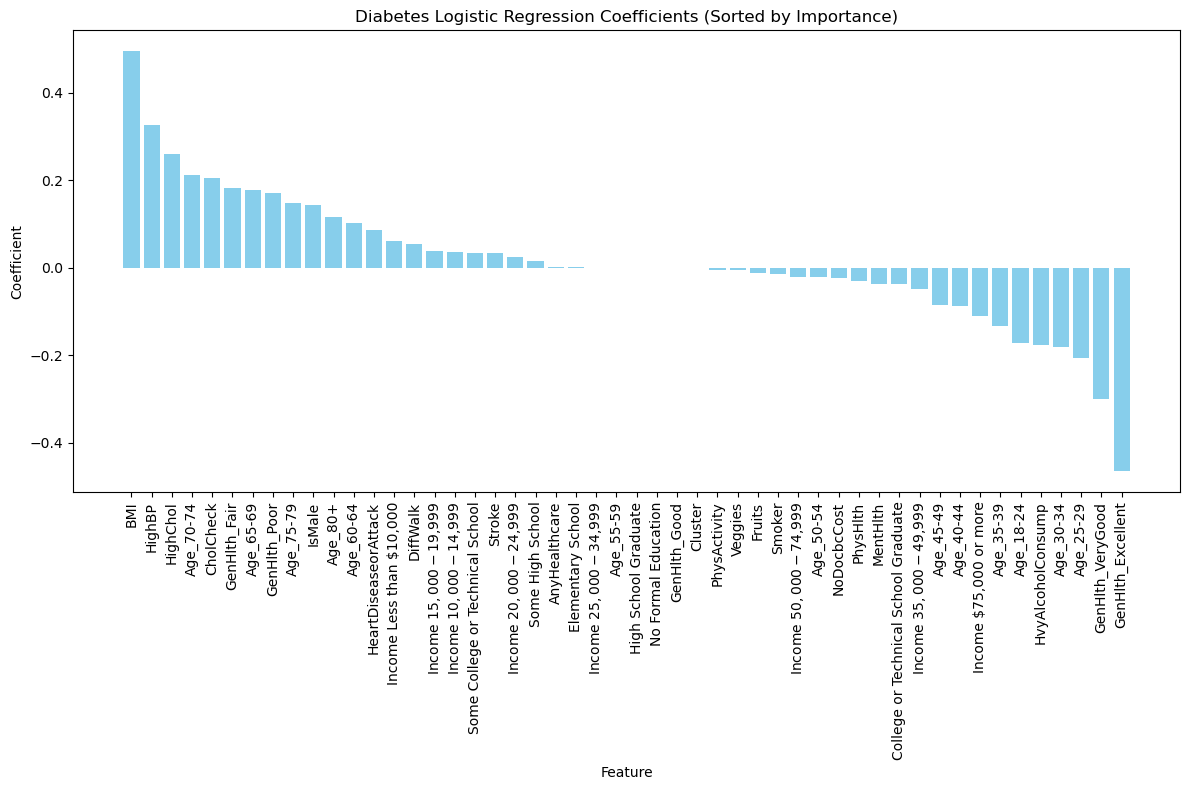

In [135]:
# Diabetes Coefficients

# Extract feature names from 'data1_encoded'
feature_names = variable_names

# Extract the coefficients corresponding to the features
coefficients = db_lr.coef_[0]

# Create a Pandas Series with feature names as index and coefficients as values
db_feature_importance_lr = pd.Series(coefficients, index=feature_names)

# Sort the Series by coefficient values in descending order
db_feature_importance_lr_sorted = db_feature_importance_lr.sort_values(ascending=False)

# Create the bar chart with the sorted Series
plt.figure(figsize=(12, 8))
plt.bar(db_feature_importance_lr_sorted.index, db_feature_importance_lr_sorted.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Diabetes Logistic Regression Coefficients (Sorted by Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The bar chart above shows the coefficient weights for each feature in the dataset, arranged by their importance or impact on the model. That being said, the positive coefficients on the left indicate features that increase the likelihood of diabetes, while negative coefficients on the right suggest features that decrease it. Here we can see that BMI was the most influential positive feature, whereas, the most significant negative feature is GenHelth.

<h4> Baseline Logistic Regression Coeficient Weight Bar  </h4>

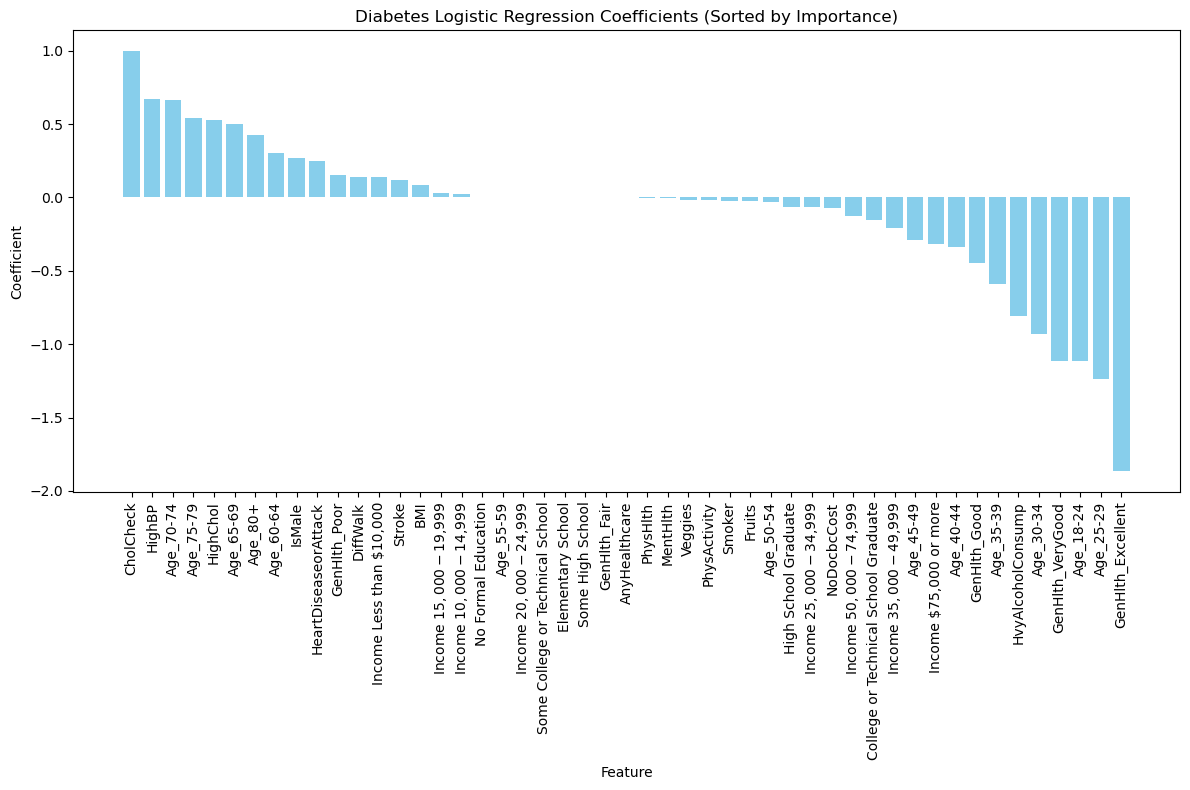

In [136]:
# Extract feature names
feature_names_rf = variable_names_rf 

# Extract the coefficients corresponding to the features
coefficients_rf = lr_rf.coef_[0]

# Create a Pandas Series with feature names as index and coefficients as values
lr_feature_importance = pd.Series(coefficients_rf, index=feature_names_rf)  

# Sort the Series by coefficient values in descending order
lr_feature_importance_sorted = lr_feature_importance.sort_values(ascending=False)

# Create the bar chart with sorted Series
plt.figure(figsize=(12, 8))
plt.bar(lr_feature_importance_sorted.index, lr_feature_importance_sorted.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Diabetes Logistic Regression Coefficients (Sorted by Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Similarly to the first bar graph we have now implemented the clustering function which means that it accounts for additional structural information in the data. This lead to different interpretations of the coeficients when compared to the modol without the 'cluster' column. This difference is critical to acknowledge in any analysis. Therefore, as show in the graph above the new most influential positive feature is now CholCheck, and GenHlth remained the most significant negative feature.

<h3> ROC curve Visual Comparison </h3>

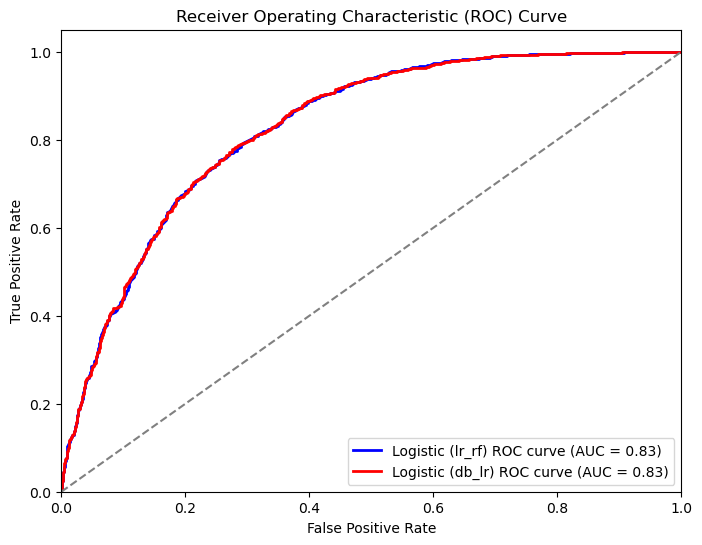

In [82]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_rf, tpr_lr_rf, color='blue', lw=2, label=f'Logistic (lr_rf) ROC curve (AUC = {roc_auc_lr_rf:.2f})')
plt.plot(fpr_db_lr, tpr_db_lr, color='red', lw=2, label=f'Logistic (db_lr) ROC curve (AUC = {roc_auc_db_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In the AUROC curve above we are comparing the 2 different Logistic Regression models. Both models achive the same AUROC score of 0.83. This indicates that both models are equally effective at classifying positive and negative cases across various thresholds

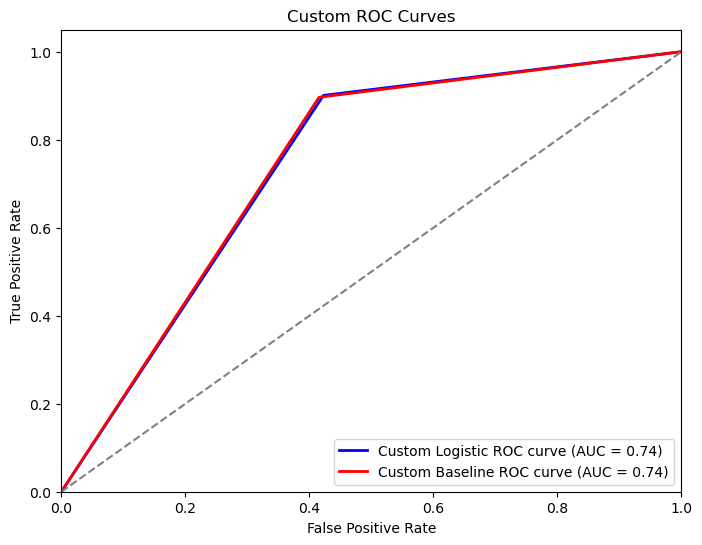

In [107]:

# Plot ROC curves for the models with custom thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Custom Logistic ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Custom Baseline ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Custom ROC Curves')
plt.legend(loc='lower right')
plt.show()

In the AUROC curve above the logistic regression model has been calibrated to achieve a 90% recall score, ensuring that it correctly identifies 90% of true positives, which is a clear indication of its sensitivity to the positive class. While this heightened sensitivity does lead to a greater number of false positives, and may result in a lower AUC compared to a more balanced model, the AUC of 0.74 still signifies a beneficial trade-off. The model's capacity to distinguish between the classes across varying thresholds is effective for the specific context where a high recall is crucial, despite the AUC being lower than what might be achieved with a different threshold setting.

<h3> Precision confusion matrix </h3>

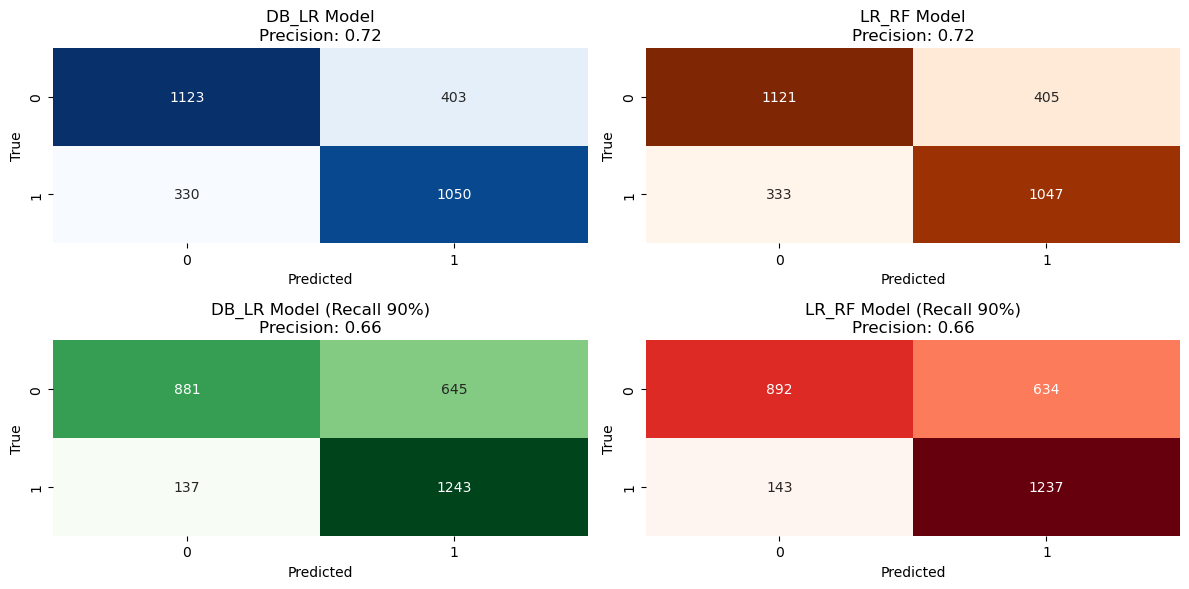

In [131]:
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the true binary labels (y_test) and probability predictions for both models
# y_test, y_pred_db_lr_prob, y_pred_lr_rf_prob

# Convert probability predictions to binary predictions using a threshold of 0.5
y_pred_db_lr = (y_pred_db_lr_prob >= 0.5).astype(int)
y_pred_lr_rf = (y_pred_lr_rf_prob >= 0.5).astype(int)

# Create confusion matrices for the models
confusion_db_lr = confusion_matrix(y_test, y_pred_db_lr)
confusion_lr_rf = confusion_matrix(y_test, y_pred_lr_rf)

# Assuming you already have y_pred_db_lr_custom and y_pred_lr_rf_custom as transformed predictions with custom thresholds

# Create confusion matrices for the models with custom thresholds
confusion_db_lr_custom = confusion_matrix(y_test, y_pred_db_lr_custom)
confusion_lr_rf_custom = confusion_matrix(y_test, y_pred_lr_rf_custom)

# Calculate precision scores for each model
precision_db_lr = precision_score(y_test, y_pred_db_lr)
precision_lr_rf = precision_score(y_test, y_pred_lr_rf)

# Calculate precision scores for each model with custom thresholds
precision_db_lr_custom = precision_score(y_test, y_pred_db_lr_custom)
precision_lr_rf_custom = precision_score(y_test, y_pred_lr_rf_custom)

# Plot the confusion matrices and print precision scores for the models
plt.figure(figsize=(12, 6))

# Confusion matrix and precision score for db_lr
plt.subplot(2, 2, 1)
sns.heatmap(confusion_db_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"DB_LR Model\nPrecision: {precision_db_lr:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

# Confusion matrix and precision score for lr_rf
plt.subplot(2, 2, 2)
sns.heatmap(confusion_lr_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title(f"LR_RF Model\nPrecision: {precision_lr_rf:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

# Confusion matrix and precision score for db_lr with custom threshold
plt.subplot(2, 2, 3)
sns.heatmap(confusion_db_lr_custom, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title(f"DB_LR Model (Recall 90%)\nPrecision: {precision_db_lr_custom:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

# Confusion matrix and precision score for lr_rf with custom threshold
plt.subplot(2, 2, 4)
sns.heatmap(confusion_lr_rf_custom, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title(f"LR_RF Model (Recall 90%)\nPrecision: {precision_lr_rf_custom:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


In the confusion matrix visuals provided, we can compare the precision of both models, alongside the original and the adjusted recall set at 90%. The confusion matrix visuals illustrate that while both models have similar overall performance, the original model achieved a precision of 0.72, whereas the model with the adjusted recall of 90% has a slightly lower precision of 0.66.

<h2> Model and Evaluation 4 </h2>

<h4> Project Summary </h4> 
The initial goal of this project was to assess the impact of incorporating unsupervised learning on the prediction accuracy of our previously best-fitting model, which was fine-tuned to enhance overall model performance. Notably, the top-performing model from the preceding lab exhibited an average recall of 0.78 and an AUC of 0.82. These metrics provide a benchmark for evaluating the effectiveness of our subsequent modifications.

During the course of experimentation, it became imperative to adapt our preprocessing approach due to the presence of outliers, particularly in the 'physhlth,' 'menthlth,' and 'bmi' features. Intriguingly, only BMI emerged as a true outlier, as the other variables were all under 30. It's crucial to highlight that the 'bmi' feature represents the number of days in the last 30 on which individuals experienced any mental or physical pain, respectively. To address this, we employed k-medoids and Gower's distance to account for outliers and mixed datatypes effectively.

Moreover, one-hot encoding was necessary to ensure compatibility with the clustering algorithm, and scaling the data before splitting facilitated more consistent clustering while saving computational time. This preprocessing methodology allowed for potential overfitting on the test set during the subsequent phases of the analysis. Subsequently, we refitted both the previously identified best model and the new model incorporating clusters as a feature.

It's noteworthy to mention that when experimenting with subsampling to determine the optimal number of clusters, we encountered low silhouette scores. This observation suggests challenges in obtaining well-defined clusters, and potential reasons for this could be explored in the subsequent analysis. Additionally, it is essential to highlight that the distribution of the data appeared similar to that of the initial response variable.

With these modifications implemented, we now proceed to analyze the results derived from the refined models, considering the impact of clustering on predictive performance. The integration of clustering as a feature aims to capture underlying patterns within the data, potentially enhancing the model's ability to discern nuanced relationships. The ensuing sections will delve into a detailed examination of these results, assessing the effectiveness of the unsupervised learning approach in augmenting the predictive capabilities of our models.
<h4> Understanding Results </h4>
The analysis of the refined models incorporating clustering revealed intriguing insights into their performance. Notably, the silhouette score of 0.10 demands attention, indicating that the clusters exhibit overlap and may not be distinctly separable. This finding raises questions about the effectiveness of the clustering algorithm in creating well-defined groups within the data.

Moving on to the primary metric of interest, the average recall, we observed that the initial model's performance was marginally worse than the hyper-tuned model, with both rounding to 0.768 when expressed to three decimals. Given that average recall is our key metric, this slight decrement is noteworthy, although the models performed equally well in terms of AUC, maintaining a consistent value of 0.83 initially.

Interestingly, the introduction of L1 regularization had a discernible impact on the cluster coefficients, driving some to zero. This outcome suggests a potential reduction in the influence of certain clusters on the model's predictions, emphasizing the need for careful consideration of regularization techniques in the context of clustering-enhanced models.

The adjusted ROC curves further illustrated the trade-off between precision and recall. The AUC decreased to 0.74, indicating that adjusting the threshold to achieve a 90% recall resulted in models that were less adept at differentiating between the response classes. In the context of our objective to maximize recall, this trade-off is acceptable, given the substantial increase in recall achieved.

Examining the confusion matrices for both the original and adjusted models, a notable drop in precision from 0.72 to 0.66 was observed. This represents a 0.6% decrease in precision, which, in this context, is an acceptable compromise for the significant gain in recall. It is crucial to recognize that precision and recall are often in tension, and in situations where identifying positive cases is paramount, a trade-off that sacrifices some precision for increased recall can be justified.

Moreover, when considering the performance of the clustering model in tandem with the regularization effects, it becomes evident that the clustering model demonstrated strikingly similar performance to the non-clustering model. The convergence in performance underlines the pivotal role played by regularization, overshadowing the distinctive impact of clustering. This convergence implies that, in the presence of robust regularization, the computational overhead incurred by clustering may outweigh the discernible advantages it brings to predictive modeling.
<h4> The best Model to use </h4> 
Despite the intriguing insights gained from the exploration of clustering-enhanced models, practical considerations highlight the original hyper-tuned logistic regression model as the preferred choice for deployment. This model, without the added complexity of clustering, stands out as the most pragmatic solution for real-world applications.

One pivotal factor supporting this choice is the ease of deployment and updates associated with the original hyper-tuned logistic regression model. The straightforward nature of logistic regression makes it not only interpretable but also readily deployable in various settings. In contrast, the introduction of clustering adds computational complexity and may pose challenges during deployment, particularly when considering large datasets.

The challenges associated with large datasets fitting into a Gowers matrix, coupled with the need for preprocessing before clustering, contribute to a convoluted and less streamlined deployment process. The computational demands of creating and maintaining the Gowers matrix can pose scalability issues, potentially hindering the efficiency of the model in a production environment.

Furthermore, the additional steps required for clustering introduce complexities that may not provide substantial benefits for the specific objectives of the project. Given that the original hyper-tuned model demonstrated comparable performance and offers a more straightforward deployment pathway, the trade-offs associated with clustering become less justified in practical scenarios.

In scenarios where computational efficiency, interpretability, and straightforward deployment are paramount, opting for the original hyper-tuned logistic regression model proves to be the most pragmatic choice. The gains achieved through clustering may not outweigh the potential challenges and complexities introduced, especially when considering the need for streamlined, scalable solutions for large datasets.

In conclusion, while the exploration of clustering has provided valuable insights, the best model for deployment aligns with the original hyper-tuned logistic regression model. This decision prioritizes ease of deployment, interpretability, and computational efficiency, offering a more practical solution for real-world applications.

<h4> How Would we proceed </h4> 

In our current analysis, we recommend proceeding with the existing model; however, based on the initial results before adjustments, we believe it's prudent to enhance the questionnaire by incorporating specific features that could contribute valuable information for diabetes modeling. Prediabetics and diabetics often exhibit symptoms such as polydipsia, polyphagia, and polyuria, which can be addressed through the inclusion of the following questions in the health survey:

- Have you experienced increased thirst?
- Have you experienced increased hunger?
- Have you experienced an increased need to urinate?

These questions directly target conditions that have shown a high correlation with diabetes. Additionally, another relevant inquiry to include in the survey is:

- Have you noticed any discolored patches of skin?

This question aims to identify potential skin manifestations like sunspots, which are indicative of diabetes. These features can be recorded as binary responses (yes/no) and serve as valuable inputs for future modeling.

The initial fit of our best model revealed a recall of 0.77, indicating that some crucial features might be missing. Incorporating the proposed questions into the survey is a proactive step to address potential gaps in the dataset. This enhancement could significantly improve the model's sensitivity and predictive capabilities for early diabetes detection.

Although these additions are recommended for future screening and model refinement before actual deployment, it's important to note that our existing model is already effective at early diabetes detection, boasting an adjusted recall of 90%. This performance metric underscores the model's capability to correctly identify positive cases, providing a strong foundation for its current application in diabetes screening.

<h2> Deployment </h2>

<h4>  Did you achieve your goals?  If not, can you reign in the utility of your modeling?</h4>
Throughout the development of our model for diabetes detection, we've critically assessed its performance using recall and AUROC as key metrics. Despite showing promise, our model encountered significant computational challenges due to the implementation of Gower's distance metric. This metric, while effective in handling mixed-type data, was computationally intensive and contributed to the curse of dimensionality, negatively impacting the model's efficiency and scalability. Additionally, we experimented with clustering techniques to enhance the model's predictive accuracy. However, this approach did not significantly improve the model's performance. The time and resources invested in clustering did not yield a proportional benefit, indicating that this method might not be the most efficient strategy for our model.

<h4>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?</h4>
In its current state, our model offers an additional avenue for early diabetes detection, which could be particularly useful for hospitals, clinics, and healthcare centers. These institutions are continuously seeking efficient and reliable methods to identify potential diabetic patients, and our model provides an innovative approach using current medical statistics and machine learning algorithms. For broader applicability and enhanced performance, our model would benefit from integrating new features based on the latest diabetes research.

<h4>What other data should be collected? </h4>

The data that should be additionaly collected were previously mentioned above in model and evaluation 4
- Have you experienced increased thirst?
- Have you experienced increased hunger?
- Have you experienced an increased need to urinate?
- Have you noticed any discolored patches of skin?

These would give us potential data on poly dipsia, polyphagia and polyuria, as well as sunspots which have been found to have potentially great impact with early diabeties detection.

Additionaly this could include findings on emerging patterns of the disease, cellular-level insights, or lifestyle factors. The integration of such features could improve the model's accuracy and relevance. Deploying this model in a healthcare setting would involve controlled experiments to evaluate its impact on clinical practice and patient outcomes. Using statistical tools like paired t-tests or ANOVA tables, we could provide evidence of its effectiveness. 

<h4>how often would the model need to be updated, etc.?</h4>

The model would also feature an auto-update mechanism to evolve with new data, although significant advancements in diabetes research would require manual incorporation of new features. To maintain its effectiveness, regular updates and refinements would be necessary, especially in light of new diabetes research. This ongoing development and adaptation would ensure that our model remains a valuable tool for healthcare providers in their efforts to combat diabetes.

<h2> Exceptional Work </h2>

After consulting with practicing data scientists to gain insights into their most preferred and frequently used modeling systems, our team decided to focus on gradient boosting. This decision was influenced by gradient boosting's exceptional accuracy, its efficiency in managing large datasets, and its adaptability across a wide range of data types. Its capability to enhance predictions by learning from past errors and to handle complex, non-linear data patterns establishes it as a solid choice for our analytical project. The idea moving forward will be to establish an initial gradient boost model, hyertune parameters using a grid search, and reimplement the new model using the hypertuned parameters. Once we have gained the recall scores for the Gradient Boost model we will be able to compare those outputs to our Logistic Regression model, along with an AUROC curve comparison.

<h4> Fit initial Gradient Boost model with "Cluster" as a feature </h4>

In [88]:
from sklearn.metrics import recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

num_folds = 5  # or any other number of folds you prefer
random_seed = 42  # or any other seed you've been using
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

# Create arrays to store new cross-validation scores
cross_val_scores_gbc_recall = []
cross_val_scores_gbc_precision = []

for train_index, test_index in kfold.split(X_no_names, y):
    X_train, X_test = X_no_names.iloc[train_index], X_no_names.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and fit the Gradient Boosting model
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)

    # Calculate recall and precision
    recall_gbc = recall_score(y_test, y_pred_gbc)
    precision_gbc = precision_score(y_test, y_pred_gbc)

    cross_val_scores_gbc_recall.append(recall_gbc)
    cross_val_scores_gbc_precision.append(precision_gbc)

    # Save final model for use later (optional)
    db_gbc = gbc


In [89]:
print("Cross-Validation Recall Scores (Gradient Boosting):", cross_val_scores_gbc_recall)
print("Cross-Validation Precision Scores (Gradient Boosting):", cross_val_scores_gbc_precision)

Cross-Validation Recall Scores (Gradient Boosting): [0.7751046025104602, 0.7807977409106954, 0.7835269271383316, 0.7738053097345132, 0.7758384668035592]
Cross-Validation Precision Scores (Gradient Boosting): [0.7184873949579832, 0.7172503242542153, 0.7213220998055736, 0.7308592443998663, 0.7393998695368559]


<h4> Analysis </h4>

The output above shows the recall and precision scores for each cross-validation fold. The recall scores are consistently around 0.77 to 0.78, indicating a stable ability to identify true positives across different data splits. Similarly, the precision scores range from approximately 0.718 to 0.739, reflecting the model's accuracy in predicting positive instances. These metrics provide a comprehensive view of the model's performance, highlighting its effectiveness in correctly identifying and accurately predicting positive cases within the dataset.

<h4> Hypertune Parameters using Grid Search </h4>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]  # optional, for stochastic gradient boosting
}

gbc = GradientBoostingClassifier(random_state=42)

# Initialize KFold (if not already defined)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

# Define GridSearch for Gradient Boosting
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=kfold, scoring='recall')

# Fit the grid search to the data
grid_search_gbc.fit(X_train, y_train)

# Get best parameters
best_params_gbc = grid_search_gbc.best_params_

print("Best Parameters for Gradient Boosting:")
print(best_params_gbc)


<h4> Analysis </h4>

The Gradient Boosting model has been fine-tuned using a Hypertune parameter grid search to identify the optimal parameters. The model achieves a good balance between speed and accuracy with a learning_rate of 0.1. To capture patterns without overfitting, a max_depth of 5 is set, allowing the trees to be sufficiently complex. With n_estimators set to 100, the model strikes a balance between performance and computational efficiency. Additionally, a subsample ratio of 0.8 is used, training each tree with 80% of the data to reduce overfitting and enhance model robustness. Collectively, these parameters optimize the model's ability to effectively learn from the data while maintaining accuracy and generalization.

<h4> Refit the Gradient Boost Model using Hypertuned Parameters </h4>

In [92]:
# Assuming X_no_names and y are your features and target variable respectively
# Initialize KFold with your specified number of folds and random seed
num_folds = 10  # or any other number of folds you prefer
random_seed = 42  # or any other seed you've been using
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

# Create arrays to store new cross-validation scores for recall and precision
cross_val_scores_gbc_recall = []
cross_val_scores_gbc_precision = []

for train_index, test_index in kfold.split(X_no_names, y):
    X_train, X_test = X_no_names.iloc[train_index], X_no_names.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and fit the Gradient Boosting model with the best parameters
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)

    # Calculate recall and precision
    recall_gbc = recall_score(y_test, y_pred_gbc)
    precision_gbc = precision_score(y_test, y_pred_gbc)

    cross_val_scores_gbc_recall.append(recall_gbc)
    cross_val_scores_gbc_precision.append(precision_gbc)

    # Save final model for use later (optional)
    db_gbc = gbc

In [93]:
print("Cross-Validation Recall Scores (Gradient Boosting):", cross_val_scores_gbc_recall)
print("Cross-Validation Precision Scores (Gradient Boosting):", cross_val_scores_gbc_precision)

Cross-Validation Recall Scores (Gradient Boosting): [0.7713690062543433, 0.7972027972027972, 0.7912621359223301, 0.7755395683453238, 0.7824858757062146, 0.7943859649122808, 0.782394366197183, 0.7857651245551601, 0.7837837837837838, 0.7891816920943134]
Cross-Validation Precision Scores (Gradient Boosting): [0.72265625, 0.7228915662650602, 0.7212389380530974, 0.71343481138319, 0.7180816591056384, 0.7214786488209051, 0.7237785016286645, 0.7320954907161804, 0.7407407407407407, 0.7370466321243523]


<h4> Analysis </h4>

The Gradient Boosting Model has been refitted using the hypertuned parameters ('n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8), resulting in a robust performance across the cross-validation folds. The recall scores, ranging from approximately 0.778 to 0.789, indicate a consistent and high ability of the model to accurately identify positive cases. This consistency in recall is significant as it suggests the model's effectiveness remains consistent across different subsets of the data.

On the precision front, the scores range from around 0.717 to 0.738. Although slightly more varied than the recall scores, these scores still demonstrate a commendable level of accuracy in the model's positive predictions. The balance between recall and precision is crucial, particularly in applications where reducing false negatives (recall) and false positives (precision) are both important.

Overall, the utilization of hypertuned parameters seems to have positively influenced the model's ability to generalize and maintain a balanced performance in accurately identifying and classifying positive instances within the dataset.

<h4> Gradient Boost ROC Curve Compared to Logistic Regression </h4>

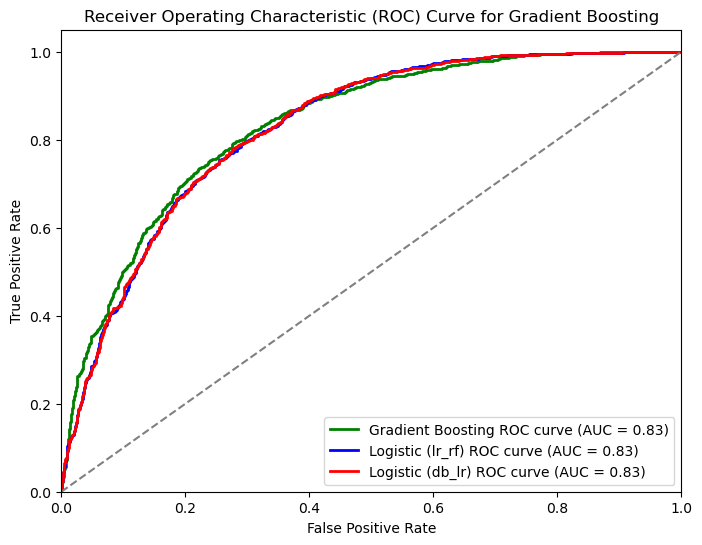

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming db_gbc is your final Gradient Boosting model and X_test, y_test are your test sets

# Predict probabilities for the positive class
y_pred_gbc_prob = db_gbc.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Gradient Boosting
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_gbc_prob)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label=f'Gradient Boosting ROC curve (AUC = {roc_auc_gbc:.2f})')
plt.plot(fpr_lr_rf, tpr_lr_rf, color='blue', lw=2, label=f'Logistic (lr_rf) ROC curve (AUC = {roc_auc_lr_rf:.2f})')
plt.plot(fpr_db_lr, tpr_db_lr, color='red', lw=2, label=f'Logistic (db_lr) ROC curve (AUC = {roc_auc_db_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


<h4> Analysis </h4>

The AUROC curve for the Gradient Boost is identical to the logistic model, consistently measured at 0.83, which indicates a strong predictive ability. This reflects its effectiveness in distinguishing between positive and negative classes. The level of AUROC is considered good, showing the model's overall accuracy in classifications.

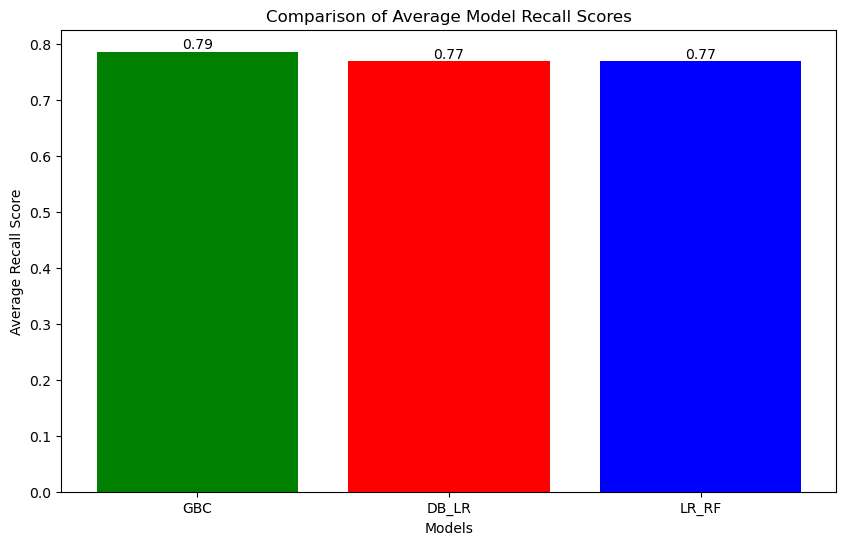

In [97]:

# Calculate the average recall scores for each model
avg_recall_gbc = np.mean(cross_val_scores_gbc_recall)
avg_recall_lr2 = np.mean(cross_val_scores_lr2)
avg_recall_lr_rf = np.mean(cross_val_scores_lr_rf)

# Names of models
model_names = ['GBC', 'DB_LR', 'LR_RF']

# Average recall scores
avg_recall_scores = [avg_recall_gbc, avg_recall_lr2, avg_recall_lr_rf]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, avg_recall_scores, color=['green', 'red', 'blue'])

# Adding titles and labels
plt.title('Comparison of Average Model Recall Scores')
plt.xlabel('Models')
plt.ylabel('Average Recall Score')

# Displaying the average recall score on top of each bar
for i in range(len(avg_recall_scores)):
    plt.text(i, avg_recall_scores[i], f'{avg_recall_scores[i]:.2f}', ha = 'center', va = 'bottom')

# Show plot
plt.show()

<h4> Final Thoughts </h4>

After analyzing the Gradient Boost model, it's evident that there are minor improvements in recall and precision metrics compared to the Logistic Regression models. Despite this, the increase in recall is marginal (only about 0.02), leading to the decision to continue using the original Logistic Regression model for real-life applications currently. However, with additional time for in-depth analysis and refinement, transitioning to the Gradient Boost model in the future could be a viable option. Gradient Boost modeling offers potential for enhanced performance, and with further tuning and experimentation, it might prove to be more beneficial for our specific needs.